In [1]:
import scanpy as sc
import pandas as pd
import numpy as np    
import matplotlib.pyplot as plt
import seaborn as sns
import os

/home/fengyu/miniconda3/envs/st/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
def vector(on=False):
    if on:
        sc.set_figure_params(dpi=50, dpi_save=600, vector_friendly=False)
    else:
        sc.set_figure_params(dpi=50, dpi_save=600, vector_friendly=True)
vector(False)

# Figure 5A

In [3]:
adata = sc.read_h5ad('/data1/fengyu/methods/zy/script_for_github/Figure4-ok_7.23/test/新增分析8.1_PPT/LA_cells_all_gene.h5ad')
csv = pd.read_csv('/data1/fengyu/methods/LA_cells.csv')
adata.obs.index = adata.obs.index.astype(str)
csv.index = csv.index.astype(str)
adata.obs['time'] = csv['slingshot_pseudotime']

/home/fengyu/miniconda3/envs/st/lib/python3.8/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/tmp/ipykernel_2798727/1305586871.py:2: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  csv = pd.read_csv('/data1/fengyu/methods/LA_cells.csv')


In [4]:
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)

In [5]:
ad_B=adata[(adata.obs['anno'].isin(['plasma_cell','b_cell']))&(adata.obs['bin50 structural annotation'].isin(['LA-TLS','LA-PCA']))]
gene_expression = ad_B.to_df()

# 确保基因表达矩阵的行是细胞，列是基因
print(gene_expression.head())
# 计算 Pearson 相关系数
correlation_results = {}
from scipy.stats import pearsonr
for gene in gene_expression.columns:
    correlation, _ = pearsonr(gene_expression[gene], ad_B.obs['time'])
    correlation_results[gene] = correlation

# 将结果转换为数据框
correlation_df = pd.DataFrame.from_dict(correlation_results, orient='index', columns=['correlation'])

   TSPAN6  TNMD  DPM1  SCYL3  C1orf112  FGR  CFH  FUCA2      GCLC  NFYA  ...  \
2     0.0   0.0   0.0    0.0       0.0  0.0  0.0    0.0  0.000000   0.0  ...   
3     0.0   0.0   0.0    0.0       0.0  0.0  0.0    0.0  4.275582   0.0  ...   
4     0.0   0.0   0.0    0.0       0.0  0.0  0.0    0.0  0.000000   0.0  ...   
5     0.0   0.0   0.0    0.0       0.0  0.0  0.0    0.0  0.000000   0.0  ...   
6     0.0   0.0   0.0    0.0       0.0  0.0  0.0    0.0  0.000000   0.0  ...   

   AC007846.2  AC134980.3  AL691520.1  AC139491.7  AC021097.2  AL590381.1  \
2         0.0         0.0         0.0         0.0         0.0         0.0   
3         0.0         0.0         0.0         0.0         0.0         0.0   
4         0.0         0.0         0.0         0.0         0.0         0.0   
5         0.0         0.0         0.0         0.0         0.0         0.0   
6         0.0         0.0         0.0         0.0         0.0         0.0   

   AC003043.2  AL356417.3  AC010616.2  AP000646.1  
2   

/home/fengyu/miniconda3/envs/st/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


In [6]:
# 将结果转换为数据框
correlation_df = pd.DataFrame.from_dict(correlation_results, orient='index', columns=['correlation'])
correlation_df_sorted = correlation_df[correlation_df['correlation'].notna()].sort_values(by='correlation', ascending=False)
correlation_df_sorted=correlation_df_sorted[correlation_df_sorted['correlation']>0.1]
correlation_df_sorted

,correlation
IGKC,0.395749
IGHG1,0.327072
IGHG4,0.305678
SFTPB,0.263210
IGHGP,0.262565
...,...
SLC34A2,0.102026
CLDN10,0.101897
BGN,0.101377
LGALS1,0.101338


In [7]:
correlation_df_sorted = correlation_df_sorted.sort_values(by='correlation', ascending=False)
correlation_df_sorted['ranking']=range(len(correlation_df_sorted), 0, -1)
correlation_df_sorted['ranking']=correlation_df_sorted['ranking']

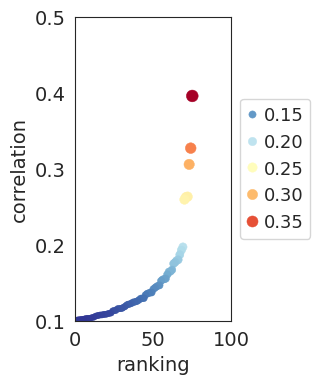

In [8]:
sns.set_style('white')
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['axes.facecolor'] = 'white'

plt.figure(figsize=(2, 4))
sns.scatterplot(data=correlation_df_sorted,x='ranking',y='correlation', 
                size='correlation',hue='correlation',palette='RdYlBu_r',edgecolor=None)
plt.xlim(0, 100)  # 设置 x 轴范围为 1 到 10000
plt.ylim(0.1, 1)
#plt.xscale('functionlog')
#plt.yscale('log')
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5),markerscale=1)
plt.ylim(0.1, 0.5)
plt.grid(False)
plt.savefig('./fig5A.pdf',dpi=600, bbox_inches='tight')

In [9]:
correlation_df_sorted

,correlation,ranking
IGKC,0.395749,75
IGHG1,0.327072,74
IGHG4,0.305678,73
SFTPB,0.263210,72
IGHGP,0.262565,71
...,...,...
SLC34A2,0.102026,5
CLDN10,0.101897,4
BGN,0.101377,3
LGALS1,0.101338,2


# Figure 5B

In [13]:
import scanpy as sc
import pandas as pd
import numpy as np    
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [15]:
adata = sc.read_h5ad('/data1/fengyu/methods/zy/script_for_github/Figure4-ok_7.23/test/新增分析8.1_PPT/LA_cells_all_gene.h5ad')
csv = pd.read_csv('/data1/fengyu/methods/LA_cells.csv')

/home/fengyu/miniconda3/envs/st/lib/python3.8/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/tmp/ipykernel_3147264/2647412100.py:2: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  csv = pd.read_csv('/data1/fengyu/methods/LA_cells.csv')


In [16]:
adata.obs.index = adata.obs.index.astype(str)
csv.index = csv.index.astype(str)
adata.obs['time'] = csv['slingshot_pseudotime']

In [17]:
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)
#sc.pp.scale(adata)
LA=adata[adata.obs['LA_anno'].notna()]

In [18]:
ad_B=adata[(adata.obs['anno'].isin(['plasma_cell','b_cell']))&(adata.obs['bin50 structural annotation'].isin(['LA-TLS','LA-PCA']))]

In [19]:
gene_expression = ad_B.to_df()
print(gene_expression.head())

   TSPAN6  TNMD  DPM1  SCYL3  C1orf112  FGR  CFH  FUCA2      GCLC  NFYA  ...  \
2     0.0   0.0   0.0    0.0       0.0  0.0  0.0    0.0  0.000000   0.0  ...   
3     0.0   0.0   0.0    0.0       0.0  0.0  0.0    0.0  4.275582   0.0  ...   
4     0.0   0.0   0.0    0.0       0.0  0.0  0.0    0.0  0.000000   0.0  ...   
5     0.0   0.0   0.0    0.0       0.0  0.0  0.0    0.0  0.000000   0.0  ...   
6     0.0   0.0   0.0    0.0       0.0  0.0  0.0    0.0  0.000000   0.0  ...   

   AC007846.2  AC134980.3  AL691520.1  AC139491.7  AC021097.2  AL590381.1  \
2         0.0         0.0         0.0         0.0         0.0         0.0   
3         0.0         0.0         0.0         0.0         0.0         0.0   
4         0.0         0.0         0.0         0.0         0.0         0.0   
5         0.0         0.0         0.0         0.0         0.0         0.0   
6         0.0         0.0         0.0         0.0         0.0         0.0   

   AC003043.2  AL356417.3  AC010616.2  AP000646.1  
2   

In [20]:
# 计算 Pearson 相关系数
correlation_results = {}
from scipy.stats import pearsonr
for gene in gene_expression.columns:
    correlation, _ = pearsonr(gene_expression[gene], ad_B.obs['time'])
    correlation_results[gene] = correlation

# 将结果转换为数据框
correlation_df = pd.DataFrame.from_dict(correlation_results, orient='index', columns=['correlation'])

/home/fengyu/miniconda3/envs/st/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


In [21]:
correlation_df_sorted = correlation_df[correlation_df['correlation'].notna()].sort_values(by='correlation', ascending=False)

In [22]:
correlation_df_sorted['ranking']=range(len(correlation_df_sorted), 0, -1)
correlation_df_sorted['ranking']=correlation_df_sorted['ranking']-len(correlation_df_sorted)/2

In [23]:
correlation_df_sorted['abso_correlation']=abs(correlation_df_sorted['correlation'])

In [24]:
#plt.style.use('seaborn-v0_8-white')
plt.style.use('dark_background')
# 确保 top_genes 是字符串列表
top_genes = correlation_df_sorted.head(30).index.astype(str).tolist()

# 确保 ad_B 的 var_names 是字符串
ad_B.var_names = ad_B.var_names.astype(str)

# 现在可以安全地切片
df = ad_B[:, top_genes].to_df()
df['time'] = ad_B.obs['time']
df_long = pd.melt(
    df,
    id_vars=['time'],
    value_vars=[
        'IGKC', 'SSR4', 'IGHG4', 'JCHAIN', 'CD63',
        'PSAP', 'IGHG1', 'IGHGP', 'IGHG3', 'IGLL5'
    ],                     # ← 这里千万别漏逗号
    var_name='curve',
    value_name='y'
)

In [25]:
df_new = (
    df_long
    .groupby(['curve', 'time'], as_index=False)  # 以 curve 和 time 为分组键
    ['y'].mean()                                # 对 y 取均值
)

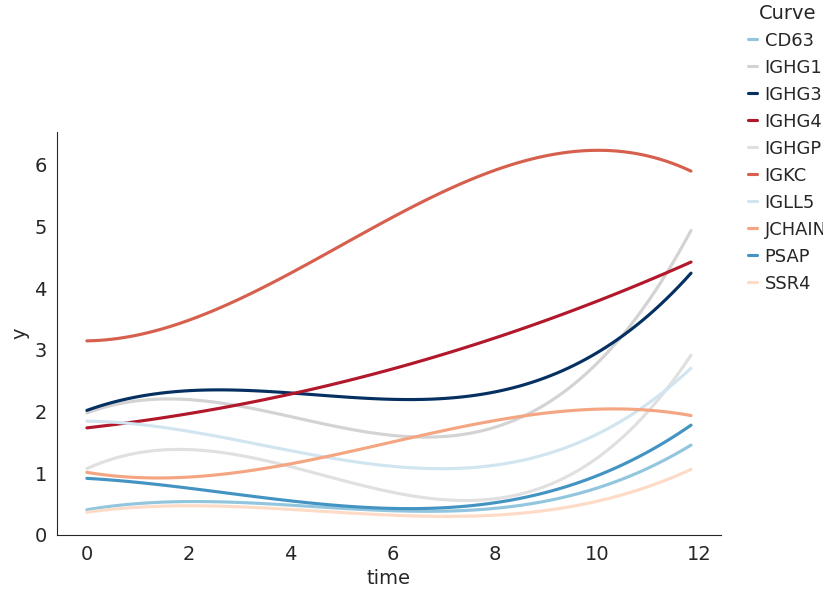

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('white')
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['axes.facecolor'] = 'white'

palette_dict = {
    'IGKC': '#d6604d',
    'SSR4': '#fddbc7',
    'IGHG4': '#b2182b',
    'JCHAIN': '#f4a582',
    'CD63': '#92c5de',
    'PSAP': '#4393c3',
    'IGHG1': 'lightgrey',
    'IGHGP': '#e0e0e0',
    'IGHG3': '#053061',
    'IGLL5':'#d1e5f0',
}

g = sns.lmplot(
    x='time',
    y='y',
    data=df_new,
    hue='curve',
    palette=palette_dict,
    aspect=1.5,
    ci=None,
    scatter=False,
    order=3
)

g._legend.set_bbox_to_anchor([1, 0.9])
g._legend.set_title('Curve')

# 保留坐标轴
# g.set(xticks=[], yticks=[])   # 已删除
# g.despine(left=True, bottom=True)  # 已删除

plt.savefig('./fig5B.pdf', dpi=600, bbox_inches='tight')

# Figure 5C

In [27]:
adata1 = sc.read_h5ad('/data1/fengyu/methods/zy/D06047A2/combine_3_meta/Final_D06047A2_after_processed_withThree_meta.h5ad')
adata2 = sc.read_h5ad('/data1/fengyu/methods/zy/D06047C3/combine_3_meta/Final_D06047C3_after_processed_withThree_meta.h5ad')
adata3 = sc.read_h5ad('/data1/fengyu/methods/zy/D06047D4/combine_3_meta/Final_D06047D4_after_processed_withThree_meta.h5ad')
adata4 = sc.read_h5ad('/data1/fengyu/methods/zy/D06047E1/combine_3_meta/Final_D06047E1_after_processed_withThree_meta.h5ad')
adata5 = sc.read_h5ad('/data1/fengyu/methods/zy/D06047E2/combine_3_meta/Final_D06047E2_after_processed_withThree_meta.h5ad')
adata6 = sc.read_h5ad('/data1/fengyu/methods/zy/D06047F6/combine_3_meta/Final_D06047F6_after_processed_withThree_meta.h5ad')
adata7 = sc.read_h5ad('/data1/fengyu/methods/zy/D06050A2/combine_3_meta/Final_D06050A2_after_processed_withThree_meta.h5ad')
adata8 = sc.read_h5ad('/data1/fengyu/methods/zy/D06050C2/combine_3_meta/Final_D06050C2_after_processed_withThree_meta.h5ad')
adata9 = sc.read_h5ad('/data1/fengyu/methods/zy/D06050D4/with_3_meta/Final_D06050D4_after_processed_withThree_meta.h5ad')
adata10 = sc.read_h5ad('/data1/fengyu/methods/zy/D06050E4/with_3_meta/Final_D06050E4_after_processed_withThree_meta.h5ad')
adata11 = sc.read_h5ad('/data1/fengyu/methods/zy/P5_D06053D2_ananlysis/Latest_analysis_6.12/readid4/Final_D06053D2_after_processed_cellbin.h5ad')

# 确保变量名唯一
adata_list = [adata1, adata2, adata3, adata4, adata5, adata6, adata7, adata8, adata9, adata10, adata11]
for adata in adata_list:
    adata.var_names_make_unique()

# 合并数据
batch_categories = ["D06047A2", "D06047C3", "D06047D4", "D06047E1", "D06047E2", "D06047F6", "D06050A2", "D06050C2", "D06050D4", "D06050E4", "D06053D2"]
adata = adata1.concatenate(adata_list[1:], batch_key="batch", batch_categories=batch_categories)

/home/fengyu/miniconda3/envs/st/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/fengyu/miniconda3/envs/st/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/fengyu/miniconda3/envs/st/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/fengyu/miniconda3/envs/st/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/fengyu/miniconda3/envs/st/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: 

In [29]:
meta=pd.read_csv('/data1/fengyu/methods/fig5/LA_bin50_meta.csv',index_col=0)
adata.obs['loc']=adata.obs['batch'].astype(str)+'_'+adata.obs['bin50_x'].map(str)+'_'+adata.obs['bin50_y'].map(str)
adata.obs=adata.obs.merge(meta[['loc','LA_anno']],on='loc',how='left')

/home/fengyu/miniconda3/envs/st/lib/python3.8/site-packages/anndata/_core/anndata.py:788: UserWarning: 
AnnData expects .obs.index to contain strings, but got values like:
    [0, 1, 2, 3, 4]

    Inferred to be: integer

  value_idx = self._prep_dim_index(value.index, attr)


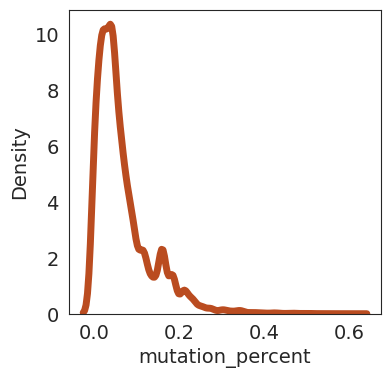

In [28]:
df=adata.obs
sns.kdeplot(data=df[df['bin50 structural annotation'].isin(['LA-PCA','LA-TLS'])]['mutation_percent'], 
            color="#BA4C20", linewidth=5)
plt.grid(False)
plt.savefig('Figure2_kdeplot_left.png',dpi = 600)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


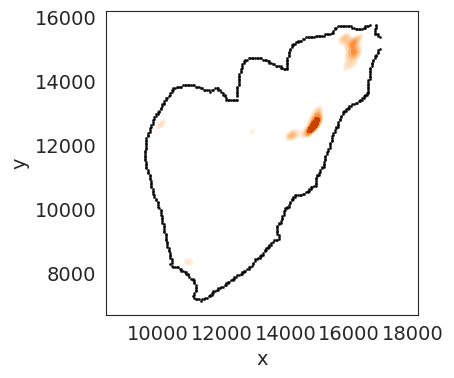

In [33]:
tissue_outline=pd.DataFrame(adata9.uns['tissue_outline'],columns=['x','y'])
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['axes.facecolor'] = 'white'

sns.kdeplot(
    adata.obs[(adata.obs['batch'] == 'D06050D4') & (adata.obs['bin50 structural annotation'].isin(['LA-TLS', 'LA-PCA']))],
    x='x', y='y', weights='mutation_percent', fill=True,
    cmap='Oranges', bw_adjust=0.3, cut=0.1, thresh=0.8, levels=10
)
sns.scatterplot(data=tissue_outline,x='x',y='y',color='black',s=3,edgecolor=None)
legend = plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=False)
for text in legend.get_texts():
    text.set_color('black')

plt.grid(False)
plt.axis('equal')
plt.savefig('Figure5c1.png',dpi = 2500)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


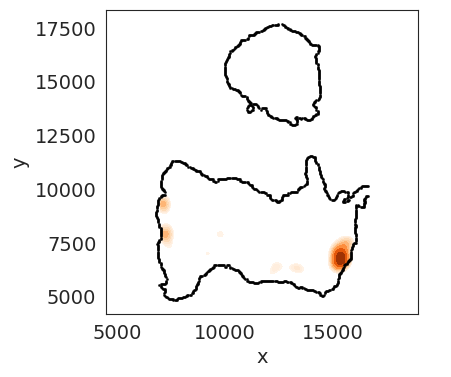

In [35]:
tissue_outline=pd.DataFrame(adata8.uns['tissue_outline'],columns=['x','y'])
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['axes.facecolor'] = 'white'

sns.kdeplot(
    adata.obs[(adata.obs['batch'] == 'D06050C2') & (adata.obs['bin50 structural annotation'].isin(['LA-TLS', 'LA-PCA']))],
    x='x', y='y', weights='mutation_percent', fill=True,
    cmap='Oranges', bw_adjust=0.3, cut=0.1, thresh=0.8, levels=10
)
sns.scatterplot(data=tissue_outline,x='x',y='y',color='black',s=3,edgecolor=None)
legend = plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=False)
for text in legend.get_texts():
    text.set_color('black')

plt.grid(False)
plt.axis('equal')
plt.savefig('Figure5c2.png',dpi = 2500)
plt.show()

# Figure 5D&E

In [3]:
adata1 = sc.read_h5ad('/data1/fengyu/methods/zy/D06047A2/combine_3_meta/Final_D06047A2_after_processed_withThree_meta.h5ad')
adata2 = sc.read_h5ad('/data1/fengyu/methods/zy/D06047C3/combine_3_meta/Final_D06047C3_after_processed_withThree_meta.h5ad')
adata3 = sc.read_h5ad('/data1/fengyu/methods/zy/D06047D4/combine_3_meta/Final_D06047D4_after_processed_withThree_meta.h5ad')
adata4 = sc.read_h5ad('/data1/fengyu/methods/zy/D06047E1/combine_3_meta/Final_D06047E1_after_processed_withThree_meta.h5ad')
adata5 = sc.read_h5ad('/data1/fengyu/methods/zy/D06047E2/combine_3_meta/Final_D06047E2_after_processed_withThree_meta.h5ad')
adata6 = sc.read_h5ad('/data1/fengyu/methods/zy/D06047F6/combine_3_meta/Final_D06047F6_after_processed_withThree_meta.h5ad')
adata7 = sc.read_h5ad('/data1/fengyu/methods/zy/D06050A2/combine_3_meta/Final_D06050A2_after_processed_withThree_meta.h5ad')
adata8 = sc.read_h5ad('/data1/fengyu/methods/zy/D06050C2/combine_3_meta/Final_D06050C2_after_processed_withThree_meta.h5ad')
adata9 = sc.read_h5ad('/data1/fengyu/methods/zy/D06050D4/with_3_meta/Final_D06050D4_after_processed_withThree_meta.h5ad')
adata10 = sc.read_h5ad('/data1/fengyu/methods/zy/D06050E4/with_3_meta/Final_D06050E4_after_processed_withThree_meta.h5ad')
adata11 = sc.read_h5ad('/data1/fengyu/methods/zy/P5_D06053D2_ananlysis/Latest_analysis_6.12/readid4/Final_D06053D2_after_processed_cellbin.h5ad')

# 确保变量名唯一
adata_list = [adata1, adata2, adata3, adata4, adata5, adata6, adata7, adata8, adata9, adata10, adata11]
for adata in adata_list:
    adata.var_names_make_unique()

# 合并数据
batch_categories = ["D06047A2", "D06047C3", "D06047D4", "D06047E1", "D06047E2", "D06047F6", "D06050A2", "D06050C2", "D06050D4", "D06050E4", "D06053D2"]
adata = adata1.concatenate(adata_list[1:], batch_key="batch", batch_categories=batch_categories)

/home/fengyu/miniconda3/envs/st/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/fengyu/miniconda3/envs/st/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/fengyu/miniconda3/envs/st/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/fengyu/miniconda3/envs/st/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/fengyu/miniconda3/envs/st/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: 

/tmp/ipykernel_3147264/2656234383.py:9: UserWarning: 
The palette list has fewer values (2) than needed (7) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(data=df[df['bin50 structural annotation'].isin(['LA-TLS','LA-PCA'])],x='x',y='y',palette=['#E64B35','#204B5A'],hue='bin50 structural annotation',legend=False,s=1)


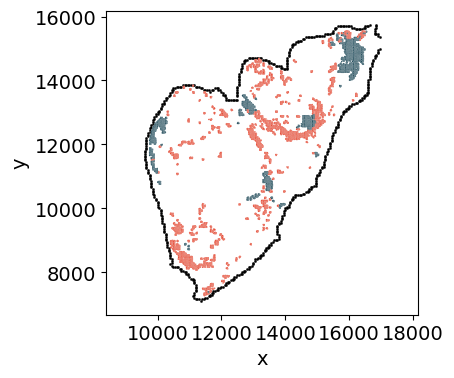

/tmp/ipykernel_3147264/2656234383.py:15: UserWarning: 

Support for alternate kernels has been removed; using Gaussian kernel.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df[(df['CSR']=='yes')], x='x', y='y', fill=True, cmap='Oranges', bw_adjust=0.2,thresh=0.5, kernel='linear', cut=0.2)


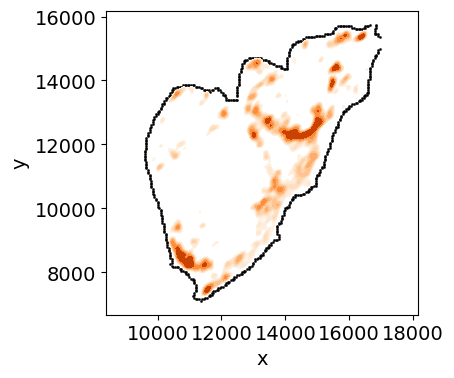

In [5]:
df=adata.obs
df=df[df['batch']=='D06050D4']
tissue_outline=pd.DataFrame(adata9.uns['tissue_outline'],columns=['x','y'])
#sns.scatterplot(data=tissue_outline,x='x',y='y',color='black',s=3,edgecolor=None)
#sns.scatterplot(data=df[(df['CSR']!='NA')&(df['bin50 structural annotation'].isin(['LA-TLS','LA-PCA']))],x='x',y='y',hue='CSR',palette=['#E64B35','#1B7D88'],s=2)
#plt.legend(loc="center left", bbox_to_anchor=(1, 0.5),markerscale=10)
#plt.show()
sns.scatterplot(data=tissue_outline,x='x',y='y',color='black',s=3,edgecolor=None)
sns.scatterplot(data=df[df['bin50 structural annotation'].isin(['LA-TLS','LA-PCA'])],x='x',y='y',palette=['#E64B35','#204B5A'],hue='bin50 structural annotation',legend=False,s=1)
plt.grid(False)
plt.axis('equal')
plt.savefig('./fig5d1_overview.png',dpi=600, bbox_inches='tight')
plt.show()
sns.scatterplot(data=tissue_outline,x='x',y='y',color='black',s=3,edgecolor=None)
sns.kdeplot(data=df[(df['CSR']=='yes')], x='x', y='y', fill=True, cmap='Oranges', bw_adjust=0.2,thresh=0.5, kernel='linear', cut=0.2)
plt.grid(False)
plt.axis('equal')
plt.savefig('./fig5e1_overview.png',dpi=600, bbox_inches='tight')

/tmp/ipykernel_3147264/1232747426.py:9: UserWarning: 
The palette list has fewer values (2) than needed (7) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(data=df[df['bin50 structural annotation'].isin(['LA-TLS','LA-PCA'])],x='x',y='y',palette=['#E64B35','#204B5A'],hue='bin50 structural annotation',legend=False,s=1)


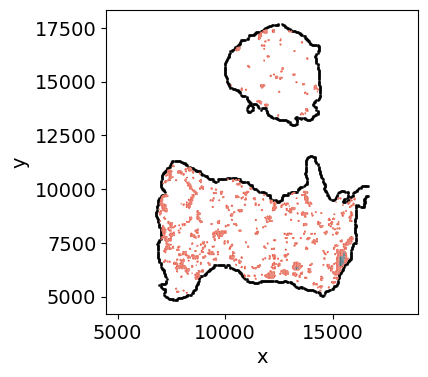

/tmp/ipykernel_3147264/1232747426.py:15: UserWarning: 

Support for alternate kernels has been removed; using Gaussian kernel.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df[(df['CSR']=='yes')], x='x', y='y', fill=True, cmap='Oranges', bw_adjust=0.2,thresh=0.5, kernel='linear', cut=0.2)


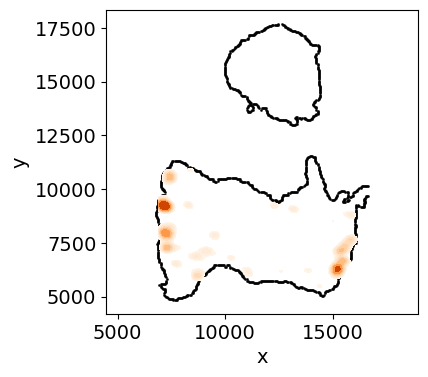

In [6]:
df=adata.obs
df=df[df['batch']=='D06050C2']
tissue_outline=pd.DataFrame(adata8.uns['tissue_outline'],columns=['x','y'])
#sns.scatterplot(data=tissue_outline,x='x',y='y',color='black',s=3,edgecolor=None)
#sns.scatterplot(data=df[(df['CSR']!='NA')&(df['bin50 structural annotation'].isin(['LA-TLS','LA-PCA']))],x='x',y='y',hue='CSR',palette=['#E64B35','#1B7D88'],s=2)
#plt.legend(loc="center left", bbox_to_anchor=(1, 0.5),markerscale=10)
#plt.show()
sns.scatterplot(data=tissue_outline,x='x',y='y',color='black',s=3,edgecolor=None)
sns.scatterplot(data=df[df['bin50 structural annotation'].isin(['LA-TLS','LA-PCA'])],x='x',y='y',palette=['#E64B35','#204B5A'],hue='bin50 structural annotation',legend=False,s=1)
plt.grid(False)
plt.axis('equal')
plt.savefig('./fig5d2_zoomin.png',dpi=2500, bbox_inches='tight')
plt.show()
sns.scatterplot(data=tissue_outline,x='x',y='y',color='black',s=3,edgecolor=None)
sns.kdeplot(data=df[(df['CSR']=='yes')], x='x', y='y', fill=True, cmap='Oranges', bw_adjust=0.2,thresh=0.5, kernel='linear', cut=0.2)
plt.grid(False)
plt.axis('equal')
plt.savefig('./fig5e2_zoomin.png',dpi=2500, bbox_inches='tight')

# Figure5F

In [36]:
adata1 = sc.read_h5ad('/data1/fengyu/methods/zy/D06047A2/combine_3_meta/Final_D06047A2_after_processed_withThree_meta.h5ad')
adata2 = sc.read_h5ad('/data1/fengyu/methods/zy/D06047C3/combine_3_meta/Final_D06047C3_after_processed_withThree_meta.h5ad')
adata3 = sc.read_h5ad('/data1/fengyu/methods/zy/D06047D4/combine_3_meta/Final_D06047D4_after_processed_withThree_meta.h5ad')
adata4 = sc.read_h5ad('/data1/fengyu/methods/zy/D06047E1/combine_3_meta/Final_D06047E1_after_processed_withThree_meta.h5ad')
adata5 = sc.read_h5ad('/data1/fengyu/methods/zy/D06047E2/combine_3_meta/Final_D06047E2_after_processed_withThree_meta.h5ad')
adata6 = sc.read_h5ad('/data1/fengyu/methods/zy/D06047F6/combine_3_meta/Final_D06047F6_after_processed_withThree_meta.h5ad')
adata7 = sc.read_h5ad('/data1/fengyu/methods/zy/D06050A2/combine_3_meta/Final_D06050A2_after_processed_withThree_meta.h5ad')
adata8 = sc.read_h5ad('/data1/fengyu/methods/zy/D06050C2/combine_3_meta/Final_D06050C2_after_processed_withThree_meta.h5ad')
adata9 = sc.read_h5ad('/data1/fengyu/methods/zy/D06050D4/with_3_meta/Final_D06050D4_after_processed_withThree_meta.h5ad')
adata10 = sc.read_h5ad('/data1/fengyu/methods/zy/D06050E4/with_3_meta/Final_D06050E4_after_processed_withThree_meta.h5ad')
adata11 = sc.read_h5ad('/data1/fengyu/methods/zy/P5_D06053D2_ananlysis/Latest_analysis_6.12/readid4/Final_D06053D2_after_processed_cellbin.h5ad')

# 确保变量名唯一
adata_list = [adata1, adata2, adata3, adata4, adata5, adata6, adata7, adata8, adata9, adata10, adata11]
for adata in adata_list:
    adata.var_names_make_unique()

# 合并数据
batch_categories = ["D06047A2", "D06047C3", "D06047D4", "D06047E1", "D06047E2", "D06047F6", "D06050A2", "D06050C2", "D06050D4", "D06050E4", "D06053D2"]
adata = adata1.concatenate(adata_list[1:], batch_key="batch", batch_categories=batch_categories)

/home/fengyu/miniconda3/envs/st/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/fengyu/miniconda3/envs/st/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/fengyu/miniconda3/envs/st/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/fengyu/miniconda3/envs/st/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/fengyu/miniconda3/envs/st/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: 

In [37]:
df=adata.obs #(all cellbin)
df['hypermuation']='no'
df.loc[df['mutation_percent']>0.2,'hypermuation']='yes'

df1=df[df['bin50 structural annotation'].isin(['LA-PCA'])]
for i in df1['batch'].unique():
    print(i,'PCA')
    print(df1[(df1['batch']==i)&(df1['hypermuation']=='yes')].shape[0]/df1[(df1['batch']==i)].shape[0])
df1=df[df['bin50 structural annotation'].isin(['LA-TLS'])]
for i in df1['batch'].unique():
    print(i,'TLS')
    print(df1[(df1['batch']==i)&(df1['hypermuation']=='yes')].shape[0]/df1[(df1['batch']==i)].shape[0])

D06047A2 PCA
0.030725214578927726
D06047C3 PCA
0.00387409200968523
D06047D4 PCA
0.025416514654019215
D06047E1 PCA
0.002297794117647059
D06047E2 PCA
0.021357519016968987
D06047F6 PCA
0.0031914893617021275
D06050A2 PCA
0.002176278563656148
D06050C2 PCA
0.0018257059396299903
D06050D4 PCA
0.017991947659788628
D06050E4 PCA
0.010380622837370242
D06053D2 PCA
0.009787413176173437
D06047A2 TLS
0.02384476237460944
D06047C3 TLS
0.0029806259314456036
D06047D4 TLS
0.01977793199167245
D06047E1 TLS
0.0010030090270812437
D06047E2 TLS
0.01199400299850075
D06047F6 TLS
0.004897159647404506
D06050A2 TLS
0.0007127583749109052
D06050C2 TLS
0.0
D06050D4 TLS
0.01174884437596302
D06053D2 TLS
0.0046334150994821474


# Figure5G

In [ ]:
adata1 = sc.read_h5ad('/data1/fengyu/methods/zy/D06047A2/combine_3_meta/Final_D06047A2_after_processed_withThree_meta.h5ad')
adata2 = sc.read_h5ad('/data1/fengyu/methods/zy/D06047C3/combine_3_meta/Final_D06047C3_after_processed_withThree_meta.h5ad')
adata3 = sc.read_h5ad('/data1/fengyu/methods/zy/D06047D4/combine_3_meta/Final_D06047D4_after_processed_withThree_meta.h5ad')
adata4 = sc.read_h5ad('/data1/fengyu/methods/zy/D06047E1/combine_3_meta/Final_D06047E1_after_processed_withThree_meta.h5ad')
adata5 = sc.read_h5ad('/data1/fengyu/methods/zy/D06047E2/combine_3_meta/Final_D06047E2_after_processed_withThree_meta.h5ad')
adata6 = sc.read_h5ad('/data1/fengyu/methods/zy/D06047F6/combine_3_meta/Final_D06047F6_after_processed_withThree_meta.h5ad')
adata7 = sc.read_h5ad('/data1/fengyu/methods/zy/D06050A2/combine_3_meta/Final_D06050A2_after_processed_withThree_meta.h5ad')
adata8 = sc.read_h5ad('/data1/fengyu/methods/zy/D06050C2/combine_3_meta/Final_D06050C2_after_processed_withThree_meta.h5ad')
adata9 = sc.read_h5ad('/data1/fengyu/methods/zy/D06050D4/with_3_meta/Final_D06050D4_after_processed_withThree_meta.h5ad')
adata10 = sc.read_h5ad('/data1/fengyu/methods/zy/D06050E4/with_3_meta/Final_D06050E4_after_processed_withThree_meta.h5ad')
adata11 = sc.read_h5ad('/data1/fengyu/methods/zy/P5_D06053D2_ananlysis/Latest_analysis_6.12/readid4/Final_D06053D2_after_processed_cellbin.h5ad')

# 确保变量名唯一
adata_list = [adata1, adata2, adata3, adata4, adata5, adata6, adata7, adata8, adata9, adata10, adata11]
for adata in adata_list:
    adata.var_names_make_unique()

# 合并数据
batch_categories = ["D06047A2", "D06047C3", "D06047D4", "D06047E1", "D06047E2", "D06047F6", "D06050A2", "D06050C2", "D06050D4", "D06050E4", "D06053D2"]
adata = adata1.concatenate(adata_list[1:], batch_key="batch", batch_categories=batch_categories)

In [39]:
import pandas as pd

# 初始化一个空的 DataFrame，用于存储结果
results_df = pd.DataFrame(columns=['batch', 'CSR_cell_percent_PCA', 'CSR_cell_percent_TLS'])

# 遍历每个批次
for i in range(0, 11):  # 注意索引范围是 0 到 10，因为 batch_categories 有 11 个元素
    data = adata_list[i]
    batch = batch_categories[i]
    
    # 提取 PCA 相关信息
    if 'PCAcluster' in data.obs.columns:
        PCA = data.obs[data.obs['PCAcluster'].notna()]
        PCA_cell_number = len(PCA)
        CSR_PCA = PCA[PCA['CSR'] == 'yes']
        CSR_PCA_cell_number = len(CSR_PCA)
        CSR_cell_percent_PCA = CSR_PCA_cell_number / PCA_cell_number if PCA_cell_number > 0 else 0
    else:
        print(f"Warning: 'PCAcluster' column not found in batch {batch}. Skipping PCA calculations.")
        CSR_cell_percent_PCA = None
    
    # 提取 TLS 相关信息
    if 'TLScluster' in data.obs.columns:
        TLS = data.obs[data.obs['TLScluster'].notna()]
        TLS_cell_number = len(TLS)
        CSR_TLS = TLS[TLS['CSR'] == 'yes']
        CSR_TLS_cell_number = len(CSR_TLS)
        CSR_cell_percent_TLS = CSR_TLS_cell_number / TLS_cell_number if TLS_cell_number > 0 else 0
    else:
        print(f"Warning: 'TLScluster' column not found in batch {batch}. Skipping TLS calculations.")
        CSR_cell_percent_TLS = None
    
    # 将结果添加到 DataFrame 中
    results_df = results_df.append({
        'batch': batch,
        'CSR_cell_percent_PCA': CSR_cell_percent_PCA,
        'CSR_cell_percent_TLS': CSR_cell_percent_TLS
    }, ignore_index=True)

# 将 DataFrame 写入 CSV 文件
results_df.to_csv('Figure5C_CSR_cell_percentages.csv', index=False)

print("结果已写入 CSV 文件：CSR_cell_percentages.csv")

结果已写入 CSV 文件：CSR_cell_percentages.csv


/tmp/ipykernel_3147264/332246267.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
/tmp/ipykernel_3147264/332246267.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
/tmp/ipykernel_3147264/332246267.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
/tmp/ipykernel_3147264/332246267.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
/tmp/ipykernel_3147264/332246267.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat inst

# Figure5H

In [ ]:
adata1 = sc.read_h5ad('/data1/fengyu/methods/zy/D06047A2/combine_3_meta/Final_D06047A2_after_processed_withThree_meta.h5ad')
adata2 = sc.read_h5ad('/data1/fengyu/methods/zy/D06047C3/combine_3_meta/Final_D06047C3_after_processed_withThree_meta.h5ad')
adata3 = sc.read_h5ad('/data1/fengyu/methods/zy/D06047D4/combine_3_meta/Final_D06047D4_after_processed_withThree_meta.h5ad')
adata4 = sc.read_h5ad('/data1/fengyu/methods/zy/D06047E1/combine_3_meta/Final_D06047E1_after_processed_withThree_meta.h5ad')
adata5 = sc.read_h5ad('/data1/fengyu/methods/zy/D06047E2/combine_3_meta/Final_D06047E2_after_processed_withThree_meta.h5ad')
adata6 = sc.read_h5ad('/data1/fengyu/methods/zy/D06047F6/combine_3_meta/Final_D06047F6_after_processed_withThree_meta.h5ad')
adata7 = sc.read_h5ad('/data1/fengyu/methods/zy/D06050A2/combine_3_meta/Final_D06050A2_after_processed_withThree_meta.h5ad')
adata8 = sc.read_h5ad('/data1/fengyu/methods/zy/D06050C2/combine_3_meta/Final_D06050C2_after_processed_withThree_meta.h5ad')
adata9 = sc.read_h5ad('/data1/fengyu/methods/zy/D06050D4/with_3_meta/Final_D06050D4_after_processed_withThree_meta.h5ad')
adata10 = sc.read_h5ad('/data1/fengyu/methods/zy/D06050E4/with_3_meta/Final_D06050E4_after_processed_withThree_meta.h5ad')
adata11 = sc.read_h5ad('/data1/fengyu/methods/zy/P5_D06053D2_ananlysis/Latest_analysis_6.12/readid4/Final_D06053D2_after_processed_cellbin.h5ad')

# 确保变量名唯一
adata_list = [adata1, adata2, adata3, adata4, adata5, adata6, adata7, adata8, adata9, adata10, adata11]
for adata in adata_list:
    adata.var_names_make_unique()

# 合并数据
batch_categories = ["D06047A2", "D06047C3", "D06047D4", "D06047E1", "D06047E2", "D06047F6", "D06050A2", "D06050C2", "D06050D4", "D06050E4", "D06053D2"]
adata = adata1.concatenate(adata_list[1:], batch_key="batch", batch_categories=batch_categories)

In [41]:
df=adata[:,['IGHG1','IGHG2','IGHG3','IGHG4','IGHA1','IGHA2','IGHM','IGHD','IGHE']].to_df()
df[['IGHG1','IGHG2','IGHG3','IGHG4','IGHA1','IGHA2','IGHM','IGHD','IGHE']] = df[['IGHG1','IGHG2','IGHG3','IGHG4','IGHA1','IGHA2','IGHM','IGHD','IGHE']].applymap(lambda x: 'no' if x == 0 else 'yes')
ighg_columns = ['IGHG1', 'IGHG2', 'IGHG3', 'IGHG4']
igha_columns = ['IGHA1', 'IGHA2']

# 新增 IGHG 列
df['IGHG'] = df[ighg_columns].apply(lambda row: 'yes' if any(row == 'yes') else 'no', axis=1)

# 新增 IGHA 列
df['IGHA'] = df[igha_columns].apply(lambda row: 'yes' if any(row == 'yes') else 'no', axis=1)
df=df[['IGHG', 'IGHA', 'IGHM', 'IGHD', 'IGHE']]
columns_to_check = ['IGHG', 'IGHA', 'IGHM', 'IGHD', 'IGHE']

# 计算每个细胞的 yes 数量
df['yes_count'] = df[columns_to_check].apply(lambda row: row[row == 'yes'].count(), axis=1)

# 根据 yes 数量判断 CSR
df['CSR'] = df['yes_count'].apply(lambda x: 'NA' if x == 0 else 'no' if x == 1 else 'yes')

# 对于 CSR 为 yes 的细胞，记录出现的类型
df['class'] = df.apply(lambda row: ', '.join(row[columns_to_check][row[columns_to_check] == 'yes'].index) if row['CSR'] == 'yes' else '', axis=1)

# 删除临时列 yes_count
df.drop(columns=['yes_count'], inplace=True)

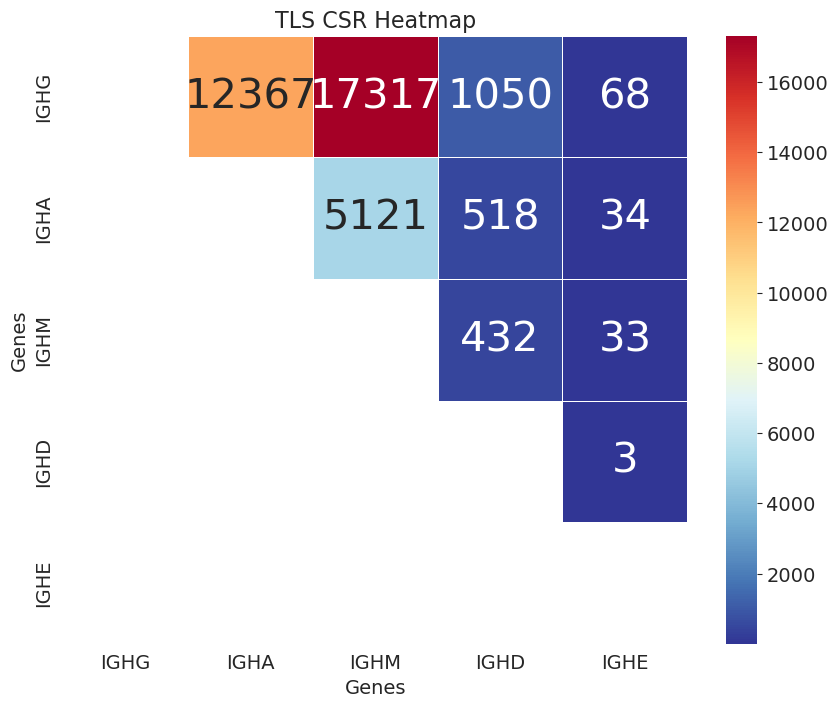

In [42]:
#df=adata.obs
tmp=df[df.index.isin(adata[adata.obs['bin50 structural annotation'].isin(['LA-PCA'])].obs.index)]
#df=df[['IGHG', 'IGHA', 'IGHM', 'IGHD', 'IGHE','CSR']]
#df.shape
columns_to_check = ['IGHG', 'IGHA', 'IGHM', 'IGHD', 'IGHE']

# 提取 CSR 为 yes 的行
csr_yes_df = tmp[tmp['CSR'] == 'yes']

# 初始化统计矩阵
csr_matrix = pd.DataFrame(index=columns_to_check, columns=columns_to_check, data=0)

# 遍历 CSR 为 yes 的行，统计每个基因的 yes 次数
for index, row in csr_yes_df.iterrows():
    yes_genes = row[columns_to_check][row[columns_to_check] == 'yes'].index
    for gene1 in yes_genes:
        for gene2 in yes_genes:
            csr_matrix.loc[gene1, gene2] += 1
            
mask = np.tril(np.ones_like(csr_matrix, dtype=bool))  # 创建下三角掩码
csr_matrix_masked1 = csr_matrix.where(~mask)  

plt.figure(figsize=(10, 8))  # 设置热图的大小

sns.heatmap(csr_matrix_masked1, annot=True, fmt="g", cmap="RdYlBu_r", 
            linewidths=.5, mask=mask,annot_kws={"fontsize": 30} )

# 添加标题和标签
plt.title('TLS CSR Heatmap', fontsize=16)
plt.xlabel('Genes', fontsize=14)
plt.ylabel('Genes', fontsize=14)

# 显示热图
plt.show()

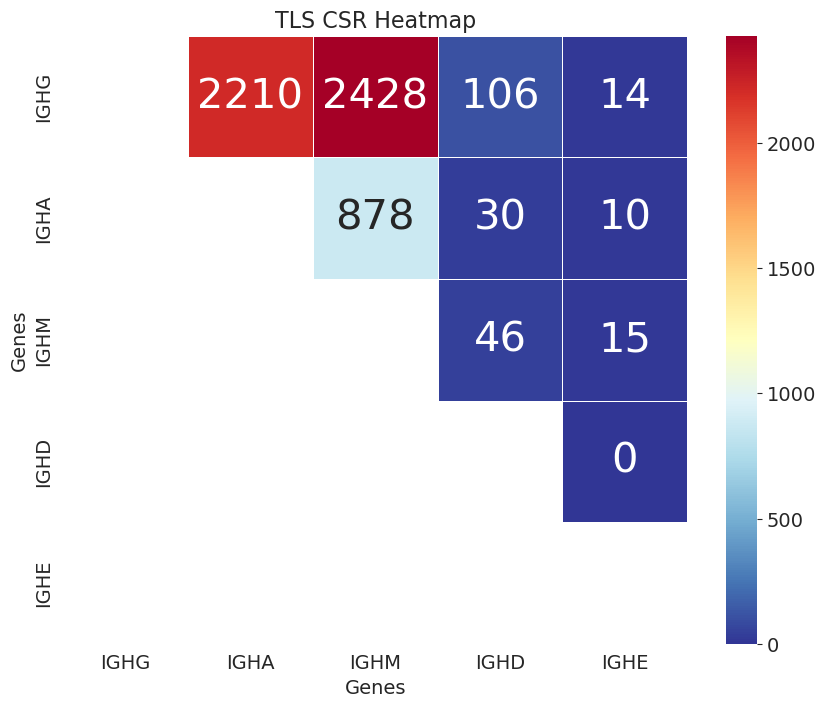

In [43]:
#df=adata.obs
tmp=df[df.index.isin(adata[adata.obs['bin50 structural annotation'].isin(['LA-TLS'])].obs.index)]
#df=df[['IGHG', 'IGHA', 'IGHM', 'IGHD', 'IGHE','CSR']]
#df.shape
columns_to_check = ['IGHG', 'IGHA', 'IGHM', 'IGHD', 'IGHE']

# 提取 CSR 为 yes 的行
csr_yes_df = tmp[tmp['CSR'] == 'yes']

# 初始化统计矩阵
csr_matrix = pd.DataFrame(index=columns_to_check, columns=columns_to_check, data=0)

# 遍历 CSR 为 yes 的行，统计每个基因的 yes 次数
for index, row in csr_yes_df.iterrows():
    yes_genes = row[columns_to_check][row[columns_to_check] == 'yes'].index
    for gene1 in yes_genes:
        for gene2 in yes_genes:
            csr_matrix.loc[gene1, gene2] += 1
            
mask = np.tril(np.ones_like(csr_matrix, dtype=bool))  # 创建下三角掩码
csr_matrix_masked = csr_matrix.where(~mask)  

plt.figure(figsize=(10, 8))  # 设置热图的大小

sns.heatmap(csr_matrix_masked, annot=True, fmt="g", cmap="RdYlBu_r", 
            linewidths=.5, mask=mask,annot_kws={"fontsize": 30} )

# 添加标题和标签
plt.title('TLS CSR Heatmap', fontsize=16)
plt.xlabel('Genes', fontsize=14)
plt.ylabel('Genes', fontsize=14)

# 显示热图
plt.show()

In [44]:
csr_matrix_masked1=csr_matrix_masked1/len(df[df.index.isin(adata[adata.obs['bin50 structural annotation'].isin(['LA-PCA'])].obs.index)])
csr_matrix_masked=csr_matrix_masked/len(df[df.index.isin(adata[adata.obs['bin50 structural annotation'].isin(['LA-TLS'])].obs.index)])

In [45]:
csr_matrix_masked1.columns=['PCA_IGHG','PCA_IGHA','PCA_IGHM','PCA_IGHD','PCA_IGHE']
csr_matrix_masked.columns=['TLS_IGHG','TLS_IGHA','TLS_IGHM','TLS_IGHD','TLS_IGHE']

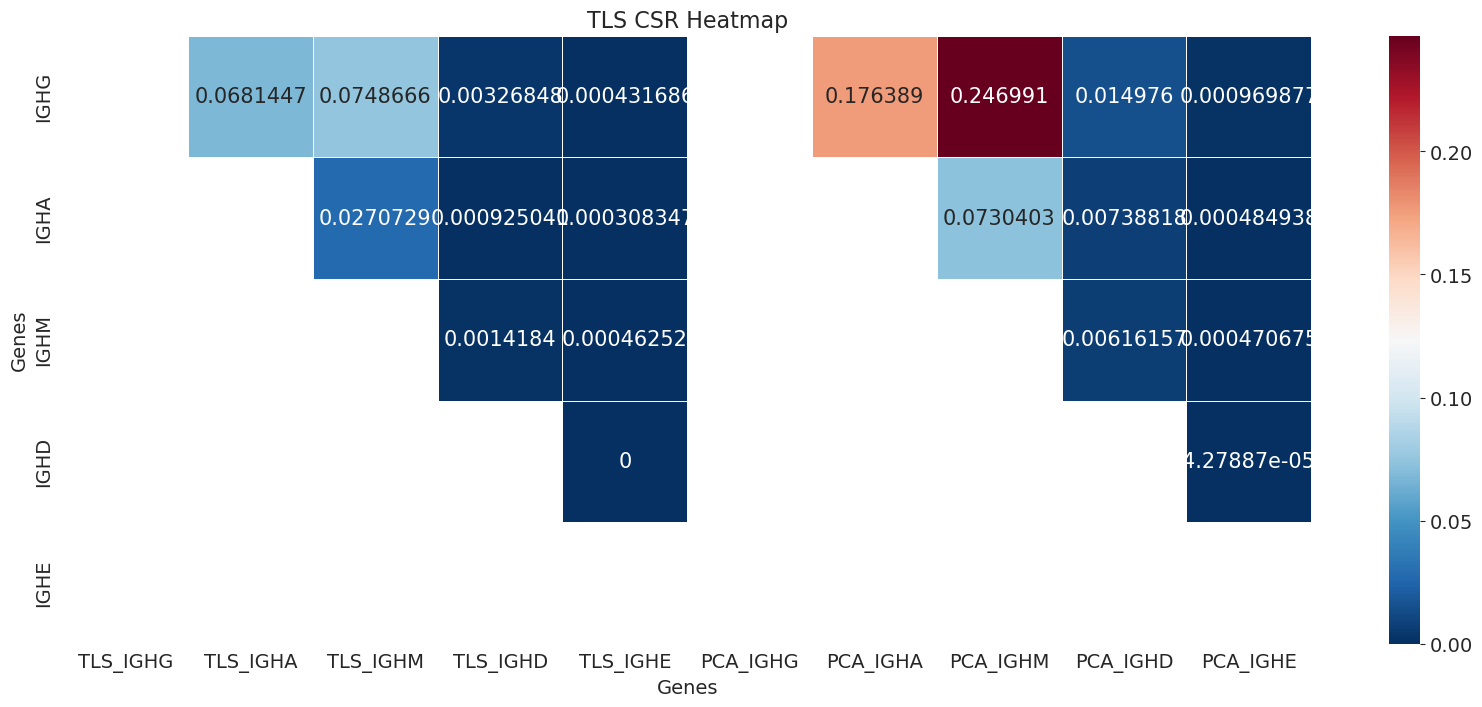

In [46]:
result = pd.concat([csr_matrix_masked, csr_matrix_masked1], axis=1)
result
plt.figure(figsize=(20, 8))  # 设置热图的大小

sns.heatmap(result, annot=True, fmt="g", cmap="RdBu_r", 
            linewidths=.5,annot_kws={"fontsize": 15} )

# 添加标题和标签
plt.title('TLS CSR Heatmap', fontsize=16)
plt.xlabel('Genes', fontsize=14)
plt.ylabel('Genes', fontsize=14)
plt.grid(False)
# 显示热图
plt.savefig('./fig5H.pdf',dpi=600, bbox_inches='tight')

# Figure5I

In [ ]:
adata1 = sc.read_h5ad('/data1/fengyu/methods/zy/D06047A2/combine_3_meta/Final_D06047A2_after_processed_withThree_meta.h5ad')
adata2 = sc.read_h5ad('/data1/fengyu/methods/zy/D06047C3/combine_3_meta/Final_D06047C3_after_processed_withThree_meta.h5ad')
adata3 = sc.read_h5ad('/data1/fengyu/methods/zy/D06047D4/combine_3_meta/Final_D06047D4_after_processed_withThree_meta.h5ad')
adata4 = sc.read_h5ad('/data1/fengyu/methods/zy/D06047E1/combine_3_meta/Final_D06047E1_after_processed_withThree_meta.h5ad')
adata5 = sc.read_h5ad('/data1/fengyu/methods/zy/D06047E2/combine_3_meta/Final_D06047E2_after_processed_withThree_meta.h5ad')
adata6 = sc.read_h5ad('/data1/fengyu/methods/zy/D06047F6/combine_3_meta/Final_D06047F6_after_processed_withThree_meta.h5ad')
adata7 = sc.read_h5ad('/data1/fengyu/methods/zy/D06050A2/combine_3_meta/Final_D06050A2_after_processed_withThree_meta.h5ad')
adata8 = sc.read_h5ad('/data1/fengyu/methods/zy/D06050C2/combine_3_meta/Final_D06050C2_after_processed_withThree_meta.h5ad')
adata9 = sc.read_h5ad('/data1/fengyu/methods/zy/D06050D4/with_3_meta/Final_D06050D4_after_processed_withThree_meta.h5ad')
adata10 = sc.read_h5ad('/data1/fengyu/methods/zy/D06050E4/with_3_meta/Final_D06050E4_after_processed_withThree_meta.h5ad')
adata11 = sc.read_h5ad('/data1/fengyu/methods/zy/P5_D06053D2_ananlysis/Latest_analysis_6.12/readid4/Final_D06053D2_after_processed_cellbin.h5ad')

# 确保变量名唯一
adata_list = [adata1, adata2, adata3, adata4, adata5, adata6, adata7, adata8, adata9, adata10, adata11]
for adata in adata_list:
    adata.var_names_make_unique()

# 合并数据
batch_categories = ["D06047A2", "D06047C3", "D06047D4", "D06047E1", "D06047E2", "D06047F6", "D06050A2", "D06050C2", "D06050D4", "D06050E4", "D06053D2"]
adata = adata1.concatenate(adata_list[1:], batch_key="batch", batch_categories=batch_categories)

/home/fengyu/miniconda3/envs/st/lib/python3.8/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


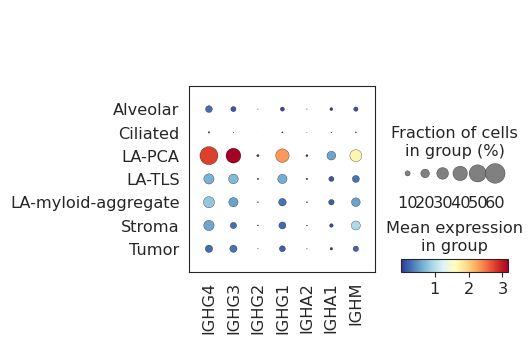

In [50]:
sc.pl.dotplot(adata,var_names=['IGHG4','IGHG3','IGHG2','IGHG1','IGHA2','IGHA1','IGHM']
              ,groupby='bin50 structural annotation',cmap='RdYlBu_r',
              use_raw=False,save='fig5I.pdf')

# Figure5J

In [ ]:
adata1 = sc.read_h5ad('/data1/fengyu/methods/zy/D06047A2/combine_3_meta/Final_D06047A2_after_processed_withThree_meta.h5ad')
adata2 = sc.read_h5ad('/data1/fengyu/methods/zy/D06047C3/combine_3_meta/Final_D06047C3_after_processed_withThree_meta.h5ad')
adata3 = sc.read_h5ad('/data1/fengyu/methods/zy/D06047D4/combine_3_meta/Final_D06047D4_after_processed_withThree_meta.h5ad')
adata4 = sc.read_h5ad('/data1/fengyu/methods/zy/D06047E1/combine_3_meta/Final_D06047E1_after_processed_withThree_meta.h5ad')
adata5 = sc.read_h5ad('/data1/fengyu/methods/zy/D06047E2/combine_3_meta/Final_D06047E2_after_processed_withThree_meta.h5ad')
adata6 = sc.read_h5ad('/data1/fengyu/methods/zy/D06047F6/combine_3_meta/Final_D06047F6_after_processed_withThree_meta.h5ad')
adata7 = sc.read_h5ad('/data1/fengyu/methods/zy/D06050A2/combine_3_meta/Final_D06050A2_after_processed_withThree_meta.h5ad')
adata8 = sc.read_h5ad('/data1/fengyu/methods/zy/D06050C2/combine_3_meta/Final_D06050C2_after_processed_withThree_meta.h5ad')
adata9 = sc.read_h5ad('/data1/fengyu/methods/zy/D06050D4/with_3_meta/Final_D06050D4_after_processed_withThree_meta.h5ad')
adata10 = sc.read_h5ad('/data1/fengyu/methods/zy/D06050E4/with_3_meta/Final_D06050E4_after_processed_withThree_meta.h5ad')
adata11 = sc.read_h5ad('/data1/fengyu/methods/zy/P5_D06053D2_ananlysis/Latest_analysis_6.12/readid4/Final_D06053D2_after_processed_cellbin.h5ad')

# 确保变量名唯一
adata_list = [adata1, adata2, adata3, adata4, adata5, adata6, adata7, adata8, adata9, adata10, adata11]
for adata in adata_list:
    adata.var_names_make_unique()

# 合并数据
batch_categories = ["D06047A2", "D06047C3", "D06047D4", "D06047E1", "D06047E2", "D06047F6", "D06050A2", "D06050C2", "D06050D4", "D06050E4", "D06053D2"]
adata = adata1.concatenate(adata_list[1:], batch_key="batch", batch_categories=batch_categories)

In [53]:
meta=pd.read_csv('/data1/fengyu/methods/fig5/LA_bin50_meta.csv',index_col=0)
adata.obs['loc']=adata.obs['batch'].astype(str)+'_'+adata.obs['bin50_x'].map(str)+'_'+adata.obs['bin50_y'].map(str)
adata.obs=adata.obs.merge(meta[['loc','LA_anno']],on='loc',how='left')

/home/fengyu/miniconda3/envs/st/lib/python3.8/site-packages/anndata/_core/anndata.py:788: UserWarning: 
AnnData expects .obs.index to contain strings, but got values like:
    [0, 1, 2, 3, 4]

    Inferred to be: integer

  value_idx = self._prep_dim_index(value.index, attr)


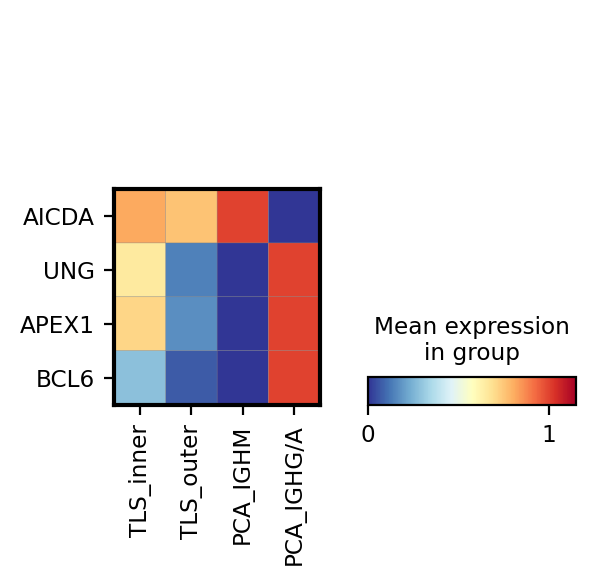

In [54]:
plt.style.use('default')
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['axes.facecolor'] = 'white'
order = ['TLS_inner', 'TLS_outer', 'PCA_IGHM', 'PCA_IGHG/A']

# 1. matrixplot
dp1 = sc.pl.matrixplot(
        adata,
        var_names=['AICDA','UNG','APEX1','BCL6'],
        groupby='LA_anno',
        standard_scale='var',
        cmap='RdYlBu_r',
        swap_axes=True,
        vmax=1.15,
        categories_order=order,
        show=False,          # 不自动显示
        return_fig=True      # 关键：返回 figure 对象
)
dp1.savefig('Figure5J1.pdf', bbox_inches='tight')

/home/fengyu/miniconda3/envs/st/lib/python3.8/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


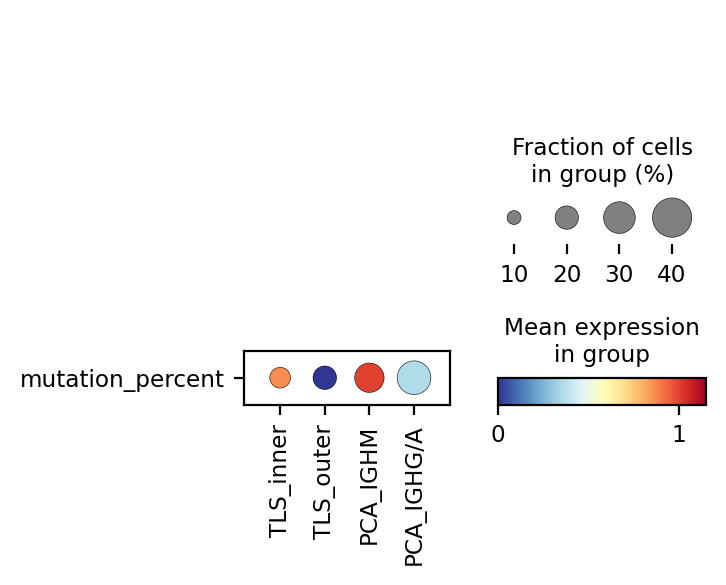

In [55]:
dp2 = sc.pl.dotplot(
        adata,
        var_names=['mutation_percent'],
        groupby='LA_anno',
        standard_scale='var',
        cmap='RdYlBu_r',
        swap_axes=True,
        vmax=1.15,
        categories_order=order,
        show=False,
        return_fig=True
)
dp2.savefig('Figure5H2.pdf', bbox_inches='tight')

# Figure5 K

In [ ]:
adata1 = sc.read_h5ad('/data1/fengyu/methods/zy/D06047A2/combine_3_meta/Final_D06047A2_after_processed_withThree_meta.h5ad')
adata2 = sc.read_h5ad('/data1/fengyu/methods/zy/D06047C3/combine_3_meta/Final_D06047C3_after_processed_withThree_meta.h5ad')
adata3 = sc.read_h5ad('/data1/fengyu/methods/zy/D06047D4/combine_3_meta/Final_D06047D4_after_processed_withThree_meta.h5ad')
adata4 = sc.read_h5ad('/data1/fengyu/methods/zy/D06047E1/combine_3_meta/Final_D06047E1_after_processed_withThree_meta.h5ad')
adata5 = sc.read_h5ad('/data1/fengyu/methods/zy/D06047E2/combine_3_meta/Final_D06047E2_after_processed_withThree_meta.h5ad')
adata6 = sc.read_h5ad('/data1/fengyu/methods/zy/D06047F6/combine_3_meta/Final_D06047F6_after_processed_withThree_meta.h5ad')
adata7 = sc.read_h5ad('/data1/fengyu/methods/zy/D06050A2/combine_3_meta/Final_D06050A2_after_processed_withThree_meta.h5ad')
adata8 = sc.read_h5ad('/data1/fengyu/methods/zy/D06050C2/combine_3_meta/Final_D06050C2_after_processed_withThree_meta.h5ad')
adata9 = sc.read_h5ad('/data1/fengyu/methods/zy/D06050D4/with_3_meta/Final_D06050D4_after_processed_withThree_meta.h5ad')
adata10 = sc.read_h5ad('/data1/fengyu/methods/zy/D06050E4/with_3_meta/Final_D06050E4_after_processed_withThree_meta.h5ad')
adata11 = sc.read_h5ad('/data1/fengyu/methods/zy/P5_D06053D2_ananlysis/Latest_analysis_6.12/readid4/Final_D06053D2_after_processed_cellbin.h5ad')

# 确保变量名唯一
adata_list = [adata1, adata2, adata3, adata4, adata5, adata6, adata7, adata8, adata9, adata10, adata11]
for adata in adata_list:
    adata.var_names_make_unique()

# 合并数据
batch_categories = ["D06047A2", "D06047C3", "D06047D4", "D06047E1", "D06047E2", "D06047F6", "D06050A2", "D06050C2", "D06050D4", "D06050E4", "D06053D2"]
adata = adata1.concatenate(adata_list[1:], batch_key="batch", batch_categories=batch_categories)
meta=pd.read_csv('/data1/fengyu/methods/fig5/LA_bin50_meta.csv',index_col=0)
adata.obs['loc']=adata.obs['batch'].astype(str)+'_'+adata.obs['bin50_x'].map(str)+'_'+adata.obs['bin50_y'].map(str)
adata.obs=adata.obs.merge(meta[['loc','LA_anno']],on='loc',how='left')

In [57]:
import pandas as pd

# 初始化一个空的 DataFrame，用于存储结果
result_df = pd.DataFrame(columns=['M_percent', 'G_percent'], index=batch_categories)

# 遍历每个批次
for i in range(0, 11):  # 注意索引范围是 0 到 10，因为 batch_categories 有 11 个元素
    batch = batch_categories[i]
    data = adata.obs[adata.obs['batch'] == batch]
    
    # 计算 M_percent
    data_M = data[data['LA_anno'] == 'PCA_IGHM']
    M_cell = data_M.shape[0]
    if M_cell > 0:
        T_cell_M = data_M[(data_M['TRAcdr3aa'].notna()) & (data_M['TRBcdr3aa'].notna())].shape[0]
        M_percent = T_cell_M / M_cell
    else:
        M_percent = 0  # 如果没有 M_cell，则 M_percent 为 0
    
    # 计算 G_percent
    data_G = data[data['LA_anno'] == 'PCA_IGHG/A']
    G_cell = data_G.shape[0]
    if G_cell > 0:
        T_cell_G = data_G[(data_G['TRAcdr3aa'].notna()) & (data_G['TRBcdr3aa'].notna())].shape[0]
        G_percent = T_cell_G / G_cell
    else:
        G_percent = 0  # 如果没有 G_cell，则 G_percent 为 0
    
    # 将结果存储到 DataFrame 中
    result_df.loc[batch, 'M_percent'] = M_percent
    result_df.loc[batch, 'G_percent'] = G_percent

# 将结果保存到 CSV 文件
result_df.to_csv('Figure5K_Tcell_percent_G_M_percent.csv')

# Figure5L

In [ ]:
adata1 = sc.read_h5ad('/data1/fengyu/methods/zy/D06047A2/combine_3_meta/Final_D06047A2_after_processed_withThree_meta.h5ad')
adata2 = sc.read_h5ad('/data1/fengyu/methods/zy/D06047C3/combine_3_meta/Final_D06047C3_after_processed_withThree_meta.h5ad')
adata3 = sc.read_h5ad('/data1/fengyu/methods/zy/D06047D4/combine_3_meta/Final_D06047D4_after_processed_withThree_meta.h5ad')
adata4 = sc.read_h5ad('/data1/fengyu/methods/zy/D06047E1/combine_3_meta/Final_D06047E1_after_processed_withThree_meta.h5ad')
adata5 = sc.read_h5ad('/data1/fengyu/methods/zy/D06047E2/combine_3_meta/Final_D06047E2_after_processed_withThree_meta.h5ad')
adata6 = sc.read_h5ad('/data1/fengyu/methods/zy/D06047F6/combine_3_meta/Final_D06047F6_after_processed_withThree_meta.h5ad')
adata7 = sc.read_h5ad('/data1/fengyu/methods/zy/D06050A2/combine_3_meta/Final_D06050A2_after_processed_withThree_meta.h5ad')
adata8 = sc.read_h5ad('/data1/fengyu/methods/zy/D06050C2/combine_3_meta/Final_D06050C2_after_processed_withThree_meta.h5ad')
adata9 = sc.read_h5ad('/data1/fengyu/methods/zy/D06050D4/with_3_meta/Final_D06050D4_after_processed_withThree_meta.h5ad')
adata10 = sc.read_h5ad('/data1/fengyu/methods/zy/D06050E4/with_3_meta/Final_D06050E4_after_processed_withThree_meta.h5ad')
adata11 = sc.read_h5ad('/data1/fengyu/methods/zy/P5_D06053D2_ananlysis/Latest_analysis_6.12/readid4/Final_D06053D2_after_processed_cellbin.h5ad')

# 确保变量名唯一
adata_list = [adata1, adata2, adata3, adata4, adata5, adata6, adata7, adata8, adata9, adata10, adata11]
for adata in adata_list:
    adata.var_names_make_unique()

# 合并数据
batch_categories = ["D06047A2", "D06047C3", "D06047D4", "D06047E1", "D06047E2", "D06047F6", "D06050A2", "D06050C2", "D06050D4", "D06050E4", "D06053D2"]
adata = adata1.concatenate(adata_list[1:], batch_key="batch", batch_categories=batch_categories)
meta=pd.read_csv('/data1/fengyu/methods/fig5/LA_bin50_meta.csv',index_col=0)
adata.obs['loc']=adata.obs['batch'].astype(str)+'_'+adata.obs['bin50_x'].map(str)+'_'+adata.obs['bin50_y'].map(str)
adata.obs=adata.obs.merge(meta[['loc','LA_anno']],on='loc',how='left')

In [60]:
mask = (adata.obs['batch'] == 'D06047A2') & (adata.obs['LA_anno'] == 'TLS_outer')
adata.obs.loc[mask, 'LA_anno'] = float('nan')
mask = (adata.obs['LA_anno'] == 'TLS_outer') 
adata.obs.loc[mask, 'LA_anno'] = float('nan')
mask = (adata.obs['LA_anno'] == 'TLS_inner') 
adata.obs.loc[mask, 'LA_anno'] = float('nan')

/home/fengyu/miniconda3/envs/st/lib/python3.8/site-packages/scanpy/plotting/_utils.py:432: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[value_to_plot + '_colors'] = colors_list
/home/fengyu/miniconda3/envs/st/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


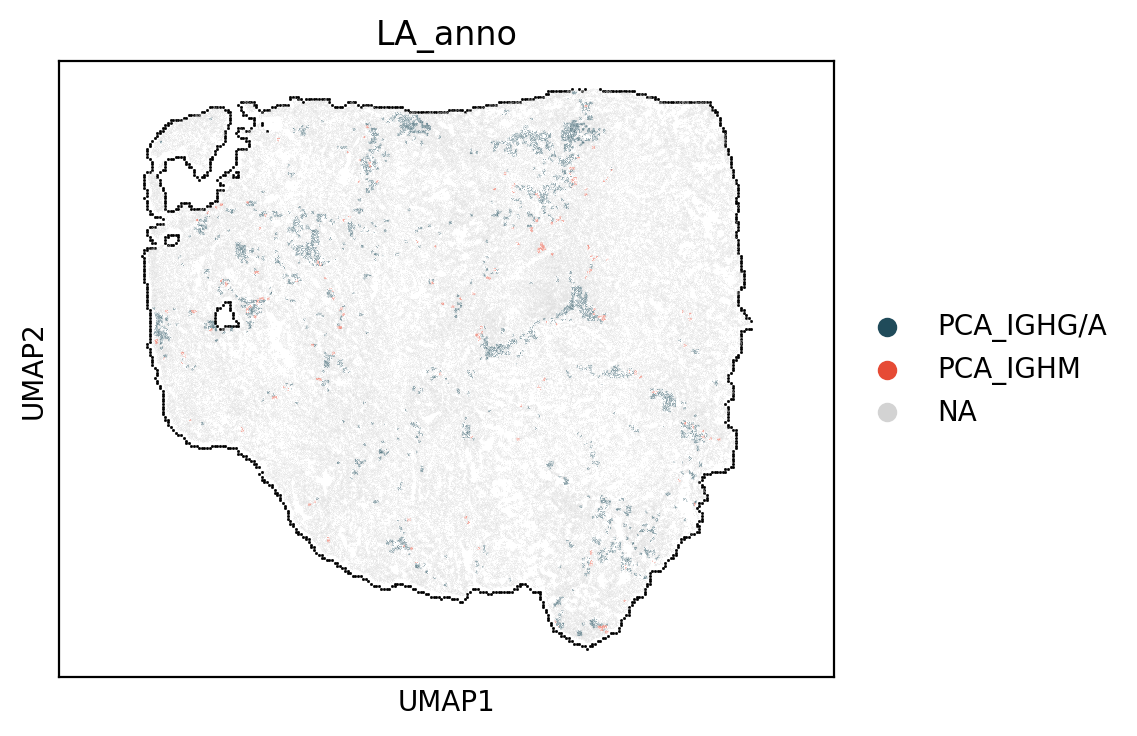

In [62]:
import scanpy as sc
import matplotlib.pyplot as plt
import scanpy as sc
# 设置全局图像大小为 5:4
plt.rcParams['figure.figsize'] = (5, 4)

# 定义 vector 函数
def vector(on=False):
    if on:
        # 设置高分辨率保存图像
        plt.rcParams['savefig.dpi'] = 600
    else:
        # 设置默认分辨率保存图像
        plt.rcParams['savefig.dpi'] = 100  # 你可以根据需要调整默认值

    # 设置绘图的显示分辨率
    plt.rcParams['figure.dpi'] = 50

plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['text.color'] = 'black'
plt.rcParams['axes.labelcolor'] = 'black'
plt.rcParams['xtick.color'] = 'black'
plt.rcParams['ytick.color'] = 'black'

# 获取所有唯一的批次
unique_batches = adata.obs['batch'].unique()

# 自定义颜色映射
color_map = {
    'PCA_IGHG/A': '#204B5A',
    'PCA_IGHM': '#E64B35',
    'NaN': '#f0f0f0'
}

# 获取所有唯一的 LA_anno 类别
unique_anno = adata.obs['LA_anno'].unique()

# 确保所有类别都有对应的颜色
for anno in unique_anno:
    if anno not in color_map:
        color_map[anno] = '#f0f0f0'
# 保存路径可以自定义
save_dir = './Figure6i&J/'
import os
os.makedirs(save_dir, exist_ok=True)

# 为每个批次绘制并保存 UMAP 图
for batch in unique_batches:
    # 创建自定义图形和轴
    if batch == 'D06047A2':
         fig, ax = plt.subplots(figsize=(5, 4))
         tissue_outline=pd.DataFrame(adata1.uns['tissue_outline'],columns=['x','y'])
         sns.scatterplot(data=tissue_outline,x='x',y='y',color='black',s=1,edgecolor = None,ax = ax)
         adata.obs_names = adata.obs_names.astype(str)
         sc.pl.umap(adata[adata.obs['batch'] == batch], color=['LA_anno'], s=0.3, show=False, palette=color_map,ax = ax)
    
         # 保存为 PDF
         save_path = f"{save_dir}_ffig6L_umap_batch_{batch}_overview.png"
         plt.grid(False)
         plt.axis('equal')
         plt.savefig(save_path, format='png', dpi = 600,bbox_inches='tight')
         plt.show()  # 关闭图形以释放内存

## 单细胞分辨率

In [63]:
df1=adata.obs
df1=df1[df1['batch']=='D06047A2']
tissue_outline=pd.DataFrame(adata1.uns['tissue_outline'],columns=['x','y'])
GA_COLOR = '#204B5A' 
GM_COLOR = '#E64B35'
df1 = df1.reset_index()

In [64]:
array_2d = adata1.obsm['cell_border'].reshape(-1, adata1.obsm['cell_border'].shape[-1])

# 创建 DataFrame
df = pd.DataFrame(array_2d)
df['cellID'] = df.index // 32
df['cellID']=df['cellID'].astype(str)
df.rename(columns={0:'x',1:'y'}, inplace=True)
df_filtered = df[(df['x'] != 32767) & (df['y'] != 32767)]
adata1.obs['cellID'] = adata1.obs['cellID'].astype(str)
df_filtered = pd.merge(df_filtered, adata1.obs[['x','y','cellID']], on='cellID', how='left')
df_filtered['x']=df_filtered['x_x']+df_filtered['x_y']
df_filtered['y']=df_filtered['y_x']+df_filtered['y_y']
df_cellborder=df_filtered[['cellID','x','y']]

In [65]:
data_GA=df1[df1['LA_anno'] == 'PCA_IGHG/A']
data_GM=df1[df1['LA_anno'] == 'PCA_IGHM']
data_GM['cellID'] = data_GM['cellID'].astype(int)
data_GA['cellID'] = data_GA['cellID'].astype(int)
cell_list = data_GM.index.tolist()
cell_list1 = data_GA.index.tolist()
df_cellborder['cellID'] = df_cellborder['cellID'].astype(int)
cell_border = df_cellborder[df_cellborder['cellID'].isin(cell_list)]
cell_border1 = df_cellborder[df_cellborder['cellID'].isin(cell_list1)]

/tmp/ipykernel_3147264/3534087261.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_GM['cellID'] = data_GM['cellID'].astype(int)
/tmp/ipykernel_3147264/3534087261.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_GA['cellID'] = data_GA['cellID'].astype(int)
/tmp/ipykernel_3147264/3534087261.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://panda

In [66]:
cell_border_list = cell_border.groupby('cellID').apply(lambda group: [[x, y] for x, y in zip(group['x'], group['y'])]).tolist()
filtered_cell_borders_list = cell_border_list
# 将每个细胞的坐标转换为 NumPy 数组
filtered_cell_borders_list = [np.array(cell) for cell in filtered_cell_borders_list]
filtered_cell_borders_list[0]

array([[13742,  4561],
       [13731,  4571],
       [13726,  4583],
       [13735,  4592],
       [13744,  4606],
       [13753,  4606],
       [13761,  4593],
       [13759,  4589],
       [13759,  4579]])

In [67]:
cell_border_list1 = cell_border1.groupby('cellID').apply(lambda group: [[x, y] for x, y in zip(group['x'], group['y'])]).tolist()
filtered_cell_borders_list1 = cell_border_list1
# 将每个细胞的坐标转换为 NumPy 数组
filtered_cell_borders_list1 = [np.array(cell) for cell in filtered_cell_borders_list1]
filtered_cell_borders_list1[0]

array([[13836,  4585],
       [13824,  4582],
       [13811,  4597],
       [13805,  4599],
       [13817,  4616],
       [13829,  4613],
       [13831,  4610],
       [13834,  4596],
       [13838,  4588]])

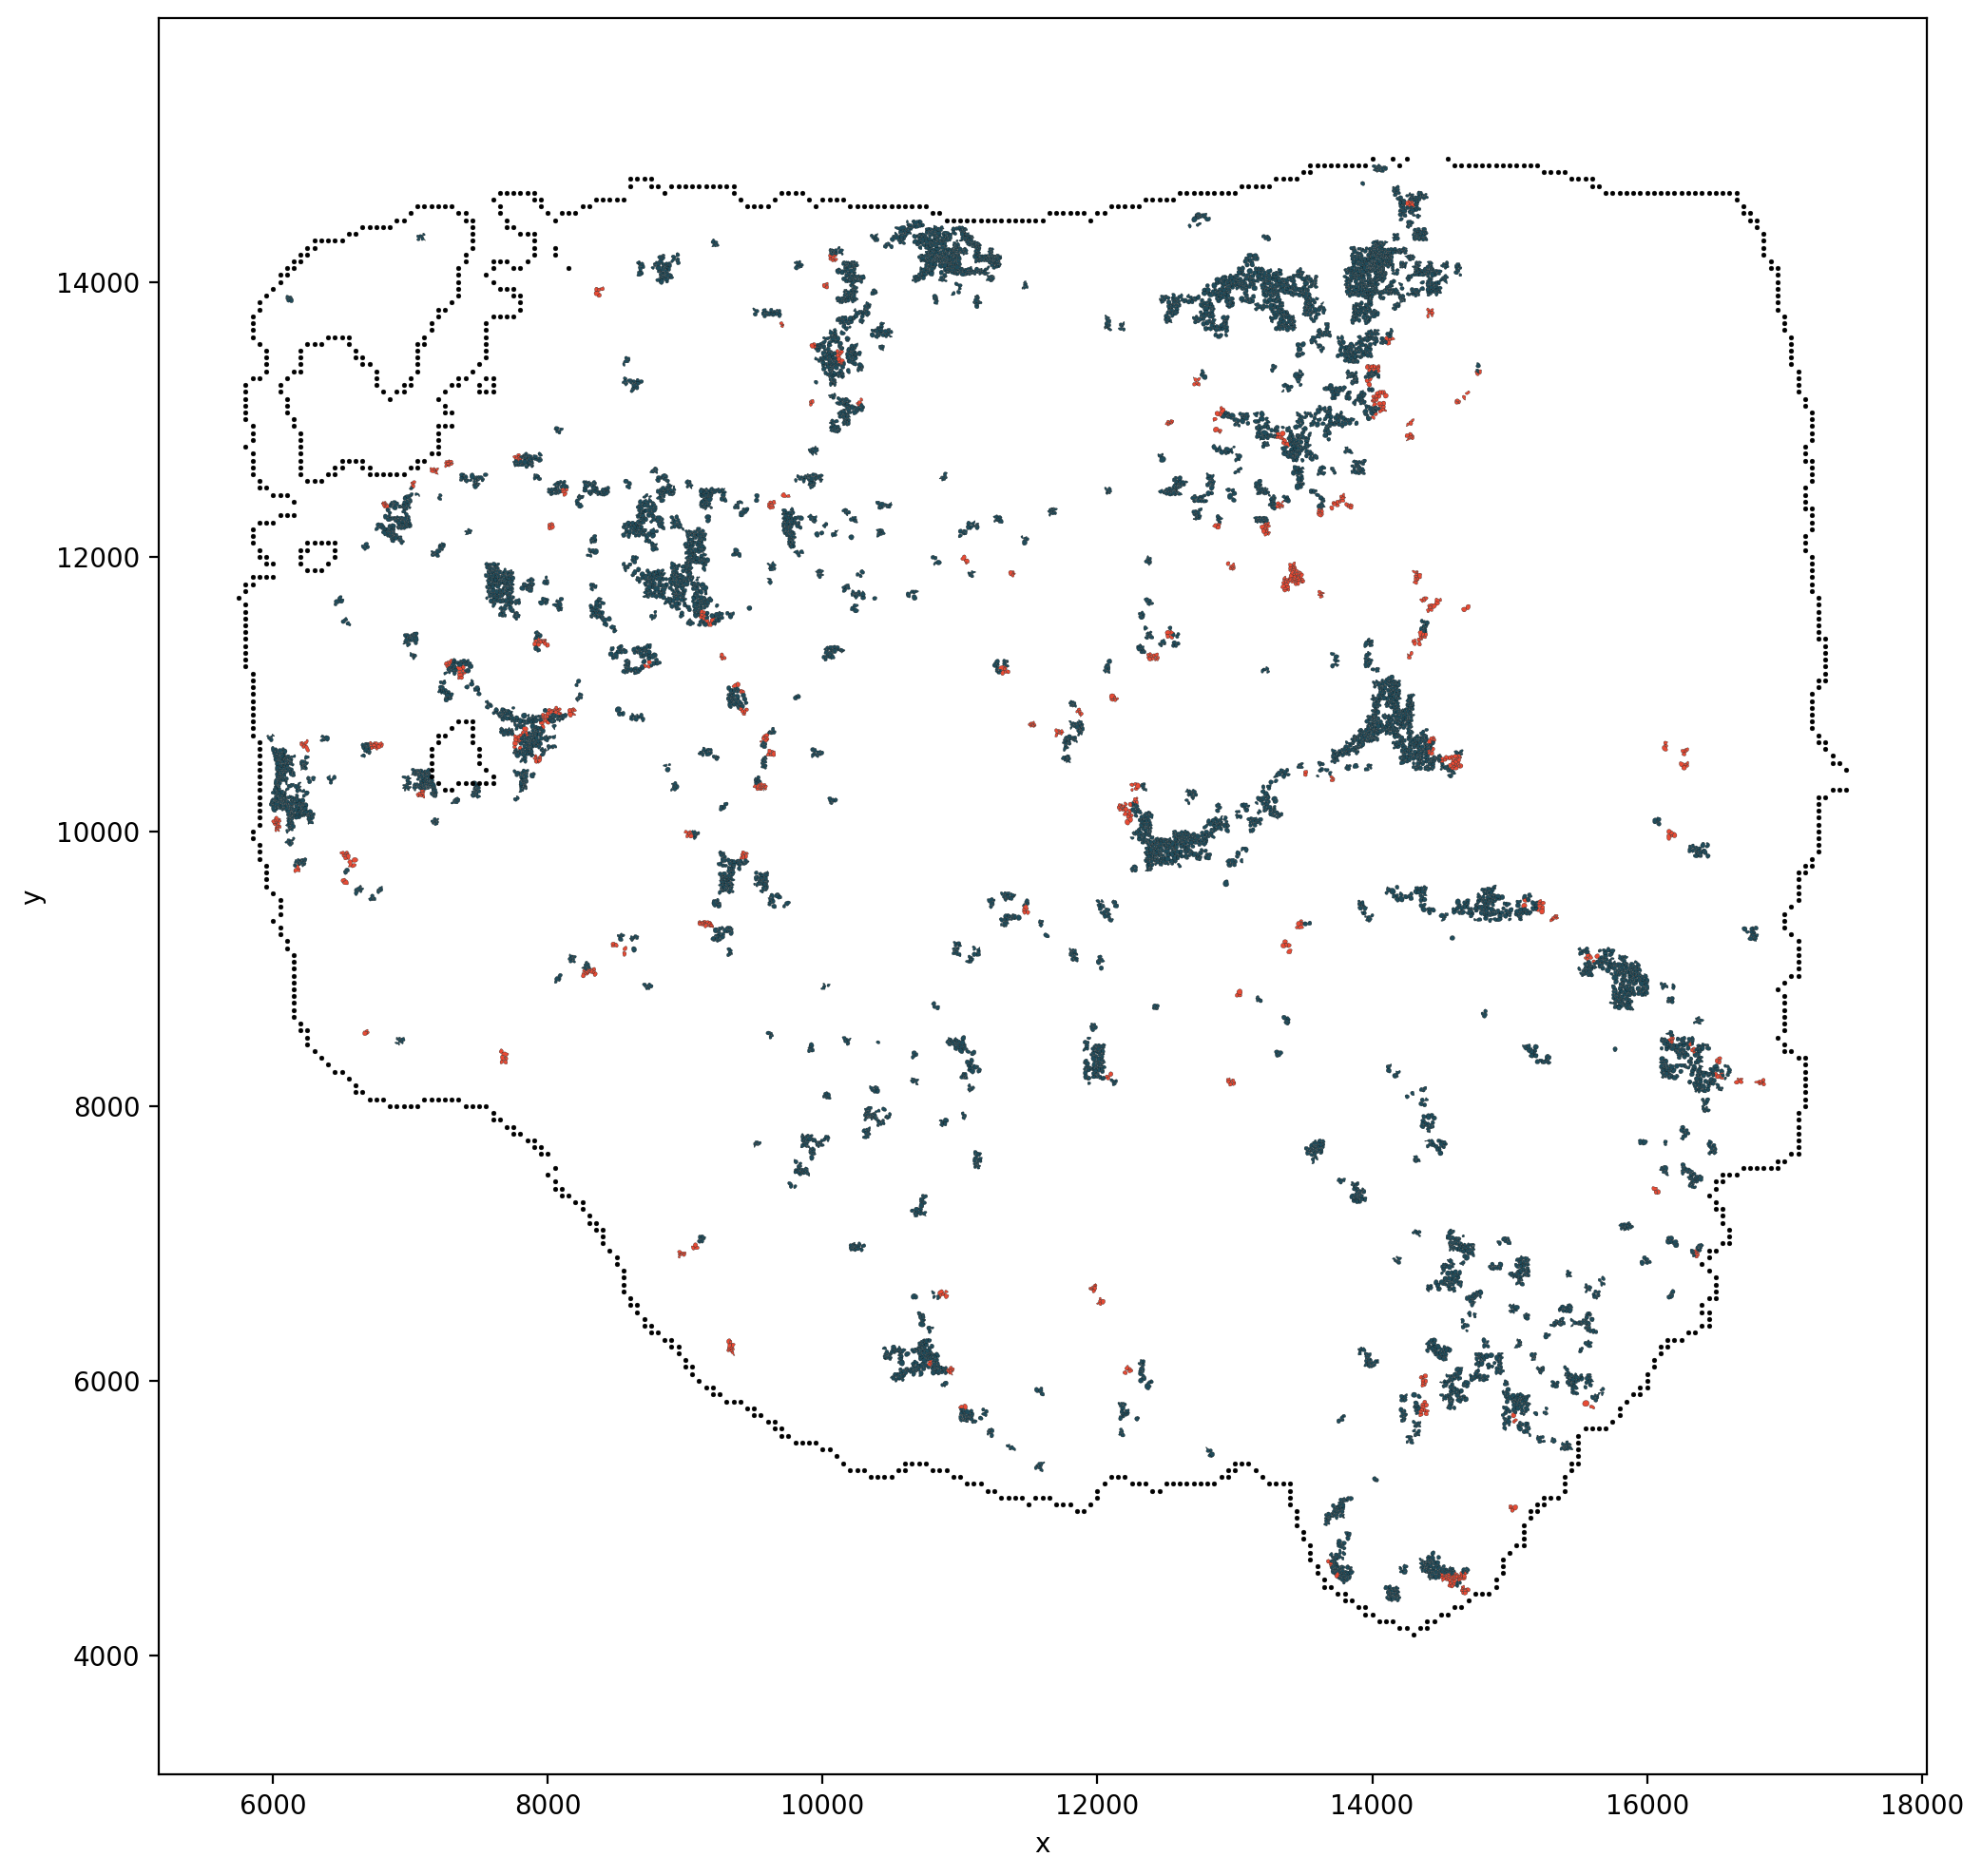

In [68]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.path import Path
from matplotlib.patches import PathPatch
from matplotlib.collections import PatchCollection
from scipy.interpolate import splprep, splev
import seaborn as sns

GM_COLOR = '#E64B35'   # 亮红
GA_COLOR = '#204B5A'   # 深蓝
BG_COLOR = 'white'     # 画布底色
TXT_COLOR = 'black'    # 文字颜色（与背景反色）

fig, ax = plt.subplots(figsize=(12, 12))
fig.patch.set_facecolor(BG_COLOR)
ax.set_facecolor(BG_COLOR)

# -------------------------------------------------
# 3. 绘制散点
# -------------------------------------------------
#ax.scatter(data_GA['x'], data_GA['y'],color=GA_COLOR, s=0.05, marker='s', rasterized=True)
#ax.scatter(data_GM['x'], data_GM['y'],color=GM_COLOR, s=0.05, marker='s', rasterized=True)

# -------------------------------------------------
# 4. 平滑边界并生成 Path 补丁
# -------------------------------------------------
def smooth_boundary(boundary, smoothness=0.5):
    x = boundary[:, 0]
    y = boundary[:, 1]
    x = np.append(x, x[0])
    y = np.append(y, y[0])
    tck, u = splprep([x, y], s=smoothness * len(x), per=True)
    u_new = np.linspace(u.min(), u.max(), 100)
    x_new, y_new = splev(u_new, tck, der=0)
    return np.column_stack((x_new, y_new))

patches = []
for cell_boundary in filtered_cell_borders_list:
    if len(cell_boundary) < 3:
        continue
    smooth = smooth_boundary(cell_boundary, 0.8)
    codes = [Path.LINETO] * len(smooth)
    codes[0] = Path.MOVETO
    codes[-1] = Path.CLOSEPOLY
    patches.append(PathPatch(Path(smooth, codes),
                             edgecolor = 'black',
                             facecolor=GM_COLOR,
                             lw = 0.1,
                             antialiased=True))

for cell_boundary in filtered_cell_borders_list1:
    if len(cell_boundary) < 3:
        continue
    smooth = smooth_boundary(cell_boundary, 0.8)
    codes = [Path.LINETO] * len(smooth)
    codes[0] = Path.MOVETO
    codes[-1] = Path.CLOSEPOLY
    patches.append(PathPatch(Path(smooth, codes),
                             edgecolor = 'black',
                             facecolor=GA_COLOR,
                             lw = 0.1,
                             antialiased=True))

ax.add_collection(PatchCollection(patches, match_original=True))

# -------------------------------------------------
# 5. 绘制组织轮廓（可选）
# -------------------------------------------------
sns.scatterplot(data=tissue_outline, x='x', y='y',
                color='black', s=3, edgecolor=None, ax=ax)

# -------------------------------------------------
# 6. 图例、坐标轴、保存
# -------------------------------------------------
legend_elements = [
    Line2D([0], [0], marker='s', color='w', label='GM',
           markerfacecolor=GM_COLOR, markersize=8, lw=0),
    Line2D([0], [0], marker='s', color='w', label='GA',
           markerfacecolor=GA_COLOR, markersize=8, lw=0)
]

plt.grid(False)
plt.axis('equal')
plt.savefig('fig5L1_zoomin.png',
            dpi=2500,               # 2500 太大，600 已足够
            bbox_inches='tight',
            facecolor=BG_COLOR,
            edgecolor='none')
plt.show()

# Figure5M

In [ ]:
adata1 = sc.read_h5ad('/data1/fengyu/methods/zy/D06047A2/combine_3_meta/Final_D06047A2_after_processed_withThree_meta.h5ad')
adata2 = sc.read_h5ad('/data1/fengyu/methods/zy/D06047C3/combine_3_meta/Final_D06047C3_after_processed_withThree_meta.h5ad')
adata3 = sc.read_h5ad('/data1/fengyu/methods/zy/D06047D4/combine_3_meta/Final_D06047D4_after_processed_withThree_meta.h5ad')
adata4 = sc.read_h5ad('/data1/fengyu/methods/zy/D06047E1/combine_3_meta/Final_D06047E1_after_processed_withThree_meta.h5ad')
adata5 = sc.read_h5ad('/data1/fengyu/methods/zy/D06047E2/combine_3_meta/Final_D06047E2_after_processed_withThree_meta.h5ad')
adata6 = sc.read_h5ad('/data1/fengyu/methods/zy/D06047F6/combine_3_meta/Final_D06047F6_after_processed_withThree_meta.h5ad')
adata7 = sc.read_h5ad('/data1/fengyu/methods/zy/D06050A2/combine_3_meta/Final_D06050A2_after_processed_withThree_meta.h5ad')
adata8 = sc.read_h5ad('/data1/fengyu/methods/zy/D06050C2/combine_3_meta/Final_D06050C2_after_processed_withThree_meta.h5ad')
adata9 = sc.read_h5ad('/data1/fengyu/methods/zy/D06050D4/with_3_meta/Final_D06050D4_after_processed_withThree_meta.h5ad')
adata10 = sc.read_h5ad('/data1/fengyu/methods/zy/D06050E4/with_3_meta/Final_D06050E4_after_processed_withThree_meta.h5ad')
adata11 = sc.read_h5ad('/data1/fengyu/methods/zy/P5_D06053D2_ananlysis/Latest_analysis_6.12/readid4/Final_D06053D2_after_processed_cellbin.h5ad')

# 确保变量名唯一
adata_list = [adata1, adata2, adata3, adata4, adata5, adata6, adata7, adata8, adata9, adata10, adata11]
for adata in adata_list:
    adata.var_names_make_unique()

# 合并数据
batch_categories = ["D06047A2", "D06047C3", "D06047D4", "D06047E1", "D06047E2", "D06047F6", "D06050A2", "D06050C2", "D06050D4", "D06050E4", "D06053D2"]
adata = adata1.concatenate(adata_list[1:], batch_key="batch", batch_categories=batch_categories)
meta=pd.read_csv('/data1/fengyu/methods/fig5/LA_bin50_meta.csv',index_col=0)
adata.obs['loc']=adata.obs['batch'].astype(str)+'_'+adata.obs['bin50_x'].map(str)+'_'+adata.obs['bin50_y'].map(str)
adata.obs=adata.obs.merge(meta[['loc','LA_anno']],on='loc',how='left')

In [70]:
adata1.obs['anno'].unique()

['cancer_cell', 'fibroblast', 'endothelial_cell', 'epi', 'ciliated_cells', 'plasma_cell', 'myeloid_cell', 'Tcell', 'b_cell', 'mast_cell']
Categories (10, object): ['Tcell', 'b_cell', 'cancer_cell', 'ciliated_cells', ..., 'fibroblast', 'mast_cell', 'myeloid_cell', 'plasma_cell']

In [87]:
data = adata[adata.obs['batch'] == 'D06047A2']
df1 = data.obs[(data.obs['LA_anno'] == 'PCA_IGHM')]

In [88]:
df1[df1['anno'] == 'Tcell']

,dnbCount,area,orig.ident,x,y,cellID,bin50_x,bin50_y,TRAcdr3aa,TRBcdr3aa,...,TRGcdr3aa,IGHcdr3aa,mutation_percent,clone_family_id,shm,depth,label,batch,hypermuation,LA_anno
48099,77,190,sample,9100,9343,48099,9100,9300,NaN,NaN,...,NaN,NaN,NaN,NaN,no,NaN,NaN,D06047A2,no,PCA_IGHM
50879,535,1037,sample,6527,9626,50879,6500,9600,NaN,NaN,...,NaN,ARYLESPSTGWIDPW,0.161538,2364.0,yes,1.0,2|A,D06047A2,no,PCA_IGHM
58208,88,182,sample,6046,10089,58208,6000,10050,NaN,NaN,...,NaN,NaN,NaN,NaN,no,NaN,NaN,D06047A2,no,PCA_IGHM
58227,97,247,sample,6020,10008,58227,6000,10000,NaN,NaN,...,NaN,NaN,NaN,NaN,no,NaN,NaN,D06047A2,no,PCA_IGHM
58232,151,344,sample,6011,10050,58232,6000,10050,NaN,NaN,...,NaN,NaN,NaN,NaN,no,NaN,NaN,D06047A2,no,PCA_IGHM
63574,86,157,sample,9584,10307,63574,9550,10300,NaN,NaN,...,NaN,NaN,NaN,NaN,no,NaN,NaN,D06047A2,no,PCA_IGHM
70150,94,181,sample,14607,10526,70150,14600,10500,NaN,NaN,...,NaN,NaN,NaN,NaN,no,NaN,NaN,D06047A2,no,PCA_IGHM
73005,111,202,sample,11869,10853,73005,11850,10850,NaN,NaN,...,NaN,ARYLESPSTGWIDPW,0.161538,2364.0,yes,1.0,2|A,D06047A2,no,PCA_IGHM
81638,80,191,sample,12366,11268,81638,12350,11250,NaN,NaN,...,NaN,NaN,NaN,NaN,no,NaN,NaN,D06047A2,no,PCA_IGHM
86184,119,228,sample,13392,11757,86184,13350,11750,NaN,NaN,...,NaN,NaN,NaN,NaN,no,NaN,NaN,D06047A2,no,PCA_IGHM


In [82]:
G_T[G_T['anno'] == 'Tcell']

,dnbCount,area,orig.ident,x,y,cellID,bin50_x,bin50_y,TRAcdr3aa,TRBcdr3aa,...,TRGcdr3aa,IGHcdr3aa,mutation_percent,clone_family_id,shm,depth,label,batch,hypermuation,LA_anno
1008,230,428,sample,14502,4631,1008,14500,4600,NaN,NaN,...,NaN,NaN,NaN,NaN,no,NaN,NaN,D06047A2,no,PCA_IGHG/A
1011,106,249,sample,14491,4615,1011,14450,4600,NaN,NaN,...,NaN,NaN,NaN,NaN,no,NaN,NaN,D06047A2,no,PCA_IGHG/A
1087,221,349,sample,14351,4698,1087,14350,4650,NaN,NaN,...,NaN,CARANCVGDCLFRWFDPW,0.092308,306.0,no,NaN,NaN,D06047A2,no,PCA_IGHG/A
1163,266,529,sample,14665,4626,1163,14650,4600,NaN,NaN,...,NaN,NaN,NaN,NaN,no,NaN,NaN,D06047A2,no,PCA_IGHG/A
4236,161,285,sample,14317,5601,4236,14300,5600,NaN,NaN,...,NaN,NaN,NaN,NaN,no,NaN,NaN,D06047A2,no,PCA_IGHG/A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127487,379,659,sample,10951,14384,127487,10950,14350,NaN,NaN,...,NaN,ARYLESPSTGWIDPW,0.161538,2364.0,yes,1.0,2|A,D06047A2,no,PCA_IGHG/A
127589,308,534,sample,11049,14349,127589,11000,14300,NaN,NaN,...,NaN,CARANCVGDCLFRWFDPW,0.184615,306.0,no,NaN,NaN,D06047A2,no,PCA_IGHG/A
127594,102,192,sample,11036,14391,127594,11000,14350,NaN,NaN,...,NaN,NaN,NaN,NaN,no,NaN,NaN,D06047A2,no,PCA_IGHG/A
127596,180,299,sample,11029,14376,127596,11000,14350,NaN,NaN,...,NaN,CARDPSHQEYLYLDHW,0.107692,787.0,no,NaN,NaN,D06047A2,no,PCA_IGHG/A


In [90]:
for  i in range(11):
    batch = batch_categories[i]
    data = adata[adata.obs['batch'] == batch]
    df = data.obs[(data.obs['LA_anno'] == 'PCA_IGHG/A')]
    df = df[df['anno'] == 'Tcell'].shape[0]
    print(batch)
    print(f'GT:{df}')
    

D06047A2
GT:474
D06047C3
GT:2
D06047D4
GT:28
D06047E1
GT:3
D06047E2
GT:48
D06047F6
GT:9
D06050A2
GT:1
D06050C2
GT:51
D06050D4
GT:31
D06050E4
GT:32
D06053D2
GT:776


# Figure5N O P Q

In [107]:
adata1 = sc.read_h5ad('/data1/fengyu/methods/zy/D06047A2/combine_3_meta/Final_D06047A2_after_processed_withThree_meta.h5ad')
adata2 = sc.read_h5ad('/data1/fengyu/methods/zy/D06047C3/combine_3_meta/Final_D06047C3_after_processed_withThree_meta.h5ad')
adata3 = sc.read_h5ad('/data1/fengyu/methods/zy/D06047D4/combine_3_meta/Final_D06047D4_after_processed_withThree_meta.h5ad')
adata4 = sc.read_h5ad('/data1/fengyu/methods/zy/D06047E1/combine_3_meta/Final_D06047E1_after_processed_withThree_meta.h5ad')
adata5 = sc.read_h5ad('/data1/fengyu/methods/zy/D06047E2/combine_3_meta/Final_D06047E2_after_processed_withThree_meta.h5ad')
adata6 = sc.read_h5ad('/data1/fengyu/methods/zy/D06047F6/combine_3_meta/Final_D06047F6_after_processed_withThree_meta.h5ad')
adata7 = sc.read_h5ad('/data1/fengyu/methods/zy/D06050A2/combine_3_meta/Final_D06050A2_after_processed_withThree_meta.h5ad')
adata8 = sc.read_h5ad('/data1/fengyu/methods/zy/D06050C2/combine_3_meta/Final_D06050C2_after_processed_withThree_meta.h5ad')
adata9 = sc.read_h5ad('/data1/fengyu/methods/zy/D06050D4/with_3_meta/Final_D06050D4_after_processed_withThree_meta.h5ad')
adata10 = sc.read_h5ad('/data1/fengyu/methods/zy/D06050E4/with_3_meta/Final_D06050E4_after_processed_withThree_meta.h5ad')
adata11 = sc.read_h5ad('/data1/fengyu/methods/zy/P5_D06053D2_ananlysis/Latest_analysis_6.12/readid4/Final_D06053D2_after_processed_cellbin.h5ad')

# 确保变量名唯一
adata_list = [adata1, adata2, adata3, adata4, adata5, adata6, adata7, adata8, adata9, adata10, adata11]
for adata in adata_list:
    adata.var_names_make_unique()

# 合并数据
batch_categories = ["D06047A2", "D06047C3", "D06047D4", "D06047E1", "D06047E2", "D06047F6", "D06050A2", "D06050C2", "D06050D4", "D06050E4", "D06053D2"]
adata = adata1.concatenate(adata_list[1:], batch_key="batch", batch_categories=batch_categories)

/home/fengyu/miniconda3/envs/st/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/fengyu/miniconda3/envs/st/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/fengyu/miniconda3/envs/st/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/fengyu/miniconda3/envs/st/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/fengyu/miniconda3/envs/st/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: 

In [113]:
tmp=adata[adata.obs['PCAcluster'].notna()]
tmp.obs['PCAcluster']=tmp.obs['batch'].astype(str)+'_'+tmp.obs['PCAcluster'].astype(str)

/tmp/ipykernel_3147264/4257473896.py:2: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  tmp.obs['PCAcluster']=tmp.obs['batch'].astype(str)+'_'+tmp.obs['PCAcluster'].astype(str)


In [114]:
genelist=['IGHG3','IGHG1','IGHG4','IGHGP','XBP1','PRDM1','IRF4','S100A6','SSR4','SSR4','IGLC2','HP','IGHA2']
sc.tl.score_genes(tmp,genelist,score_name='pseudogenes')
sc.tl.score_genes(tmp,gene_list=['IGHG1','IGHG3','IGHG4'],score_name='IgGsecretion',use_raw=False)

In [117]:
df=tmp.obs

In [120]:
df = df[df['CSR'] != 'NA']

In [121]:
# 3) 定义 T 细胞标识列：True/False
df['is_Tcell'] = df['TRAcdr3aa'].notna() | df['TRBcdr3aa'].notna()

# 4) 聚合
out = (
    df
    .groupby('PCAcluster')
    .agg(
        CSR_counts=('CSR', lambda x: (x == 'yes').mean()),
        pseudogenes_mean=('pseudogenes', 'mean'),
        Tcell_proportion=('is_Tcell', 'mean')
    )
    .reset_index()
)

# 5) 列顺序与命名按需求调整
out = out[['PCAcluster', 'Tcell_proportion', 'CSR_counts', 'pseudogenes_mean']]
out['pseudogenes_mean']=out['pseudogenes_mean']+0.05

/tmp/ipykernel_3147264/283621134.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['is_Tcell'] = df['TRAcdr3aa'].notna() | df['TRBcdr3aa'].notna()


Pearson r = 0.741, p = 5.122e-19


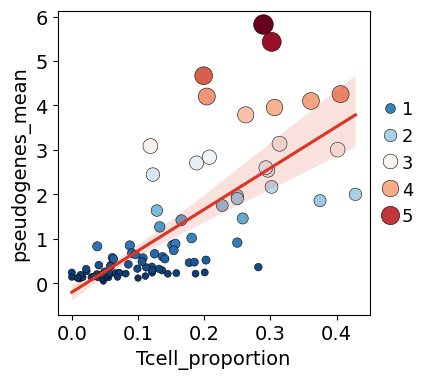

In [124]:
out['batch'] = out['PCAcluster'].str.split('_').str[0]
sns.scatterplot(data=out,x='Tcell_proportion',y='pseudogenes_mean',hue='pseudogenes_mean',sizes=(20, 200),
                size='pseudogenes_mean',palette='RdBu_r',edgecolor='black')
#sns.kdeplot(data=out,x='CSR_counts',y='Tcell_proportion', weights='pseudogenes_mean',
#            fill=False, cmap ='inferno', bw_adjust=1, cut=1,thresh=0.8,levels=5)
sns.regplot(data=out,marker=None,
            x='Tcell_proportion',scatter=False,
            y='pseudogenes_mean',
            scatter_kws={'alpha':0.7},
            line_kws={'color':'#DB3628'})
legend = plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=False)
for text in legend.get_texts():
    text.set_color('black')

plt.grid(False)

import scipy.stats as st
r, p = st.pearsonr(out['pseudogenes_mean'], out['Tcell_proportion'])
print(f"Pearson r = {r:.3f}, p = {p:.4g}")
plt.savefig('Figure5L.pdf')

Pearson r = 0.371, p = 0.0001244


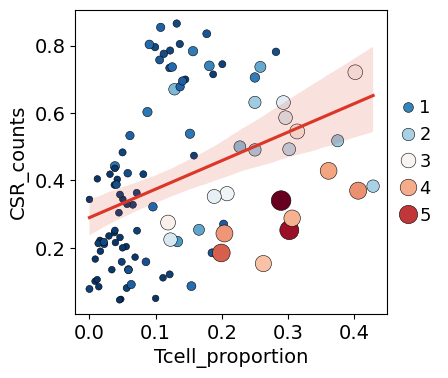

In [125]:
out['batch'] = out['PCAcluster'].str.split('_').str[0]
sns.scatterplot(data=out,x='Tcell_proportion',y='CSR_counts',hue='pseudogenes_mean',sizes=(20, 200),
                size='pseudogenes_mean',palette='RdBu_r',edgecolor='black')
#sns.kdeplot(data=out,x='CSR_counts',y='Tcell_proportion', weights='pseudogenes_mean',
#            fill=False, cmap ='inferno', bw_adjust=1, cut=1,thresh=0.8,levels=5)
sns.regplot(data=out,marker=None,
            x='Tcell_proportion',scatter=False,
            y='CSR_counts',
            scatter_kws={'alpha':0.7},
            line_kws={'color':'#DB3628'})
legend = plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=False)
for text in legend.get_texts():
    text.set_color('black')

plt.grid(False)

import scipy.stats as st
r, p = st.pearsonr(out['CSR_counts'], out['Tcell_proportion'])
print(f"Pearson r = {r:.3f}, p = {p:.4g}")
plt.savefig('Figure5o.pdf')

In [126]:
df=tmp.obs
df = df[df['CSR'] != 'NA']
# 3) 定义 T 细胞标识列：True/False
df['is_Tcell'] = df['TRAcdr3aa'].notna() | df['TRBcdr3aa'].notna()

# 4) 聚合
out = (
    df
    .groupby('PCAcluster')
    .agg(
        CSR_counts=('CSR', lambda x: (x == 'yes').mean()),
        IgGsecretion=('IgGsecretion', 'mean'),
        Tcell_proportion=('is_Tcell', 'mean')
    )
    .reset_index()
)

# 5) 列顺序与命名按需求调整
out = out[['PCAcluster', 'Tcell_proportion', 'CSR_counts', 'IgGsecretion']]
#out['pseudogenes_mean']=out['pseudogenes_mean']+0.05

/tmp/ipykernel_3147264/1097500488.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['is_Tcell'] = df['TRAcdr3aa'].notna() | df['TRBcdr3aa'].notna()


In [127]:
# 4) 聚合
out = (
    df
    .groupby('PCAcluster')
    .agg(
        CSR_counts=('CSR', lambda x: (x == 'yes').mean()),
        IgGsecretion=('IgGsecretion', 'mean'),
        Tcell_proportion=('is_Tcell', 'mean'),
        mutation_percent = ('mutation_percent','mean')
    )
    .reset_index()
)

# 5) 列顺序与命名按需求调整
out = out[['PCAcluster', 'Tcell_proportion', 'CSR_counts', 'IgGsecretion','mutation_percent']]
#out['pseudogenes_mean']=out['pseudogenes_mean']+0.05

Pearson r = 0.739, p = 8.047e-19


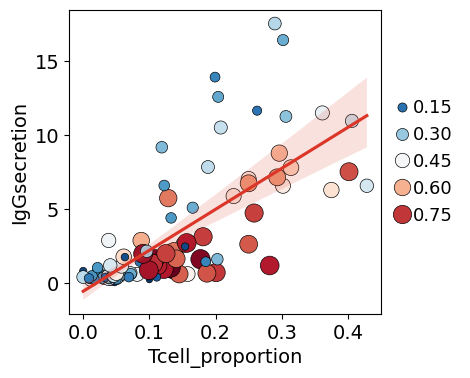

In [128]:
out['batch'] = out['PCAcluster'].str.split('_').str[0]
sns.scatterplot(data=out,x='Tcell_proportion',y='IgGsecretion',hue='CSR_counts',
                edgecolor='black',sizes=(20, 200),
                size='CSR_counts',palette='RdBu_r')
#sns.kdeplot(data=out,x='CSR_counts',y='Tcell_proportion', weights='pseudogenes_mean',
#            fill=False, cmap ='inferno', bw_adjust=1, cut=1,thresh=0.8,levels=5)
sns.regplot(data=out,marker=None,
            x='Tcell_proportion',scatter=False,
            y='IgGsecretion',
            scatter_kws={'alpha':0.7},
            line_kws={'color':'#DB3628'})
legend = plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=False)
for text in legend.get_texts():
    text.set_color('black')

plt.grid(False)

import scipy.stats as st
r, p = st.pearsonr(out['Tcell_proportion'], out['IgGsecretion'])
print(f"Pearson r = {r:.3f}, p = {p:.4g}")
plt.savefig('Figure5P.pdf')

In [129]:
out = out[out['mutation_percent'].notna()]

Pearson r = 0.014, p = 0.8927


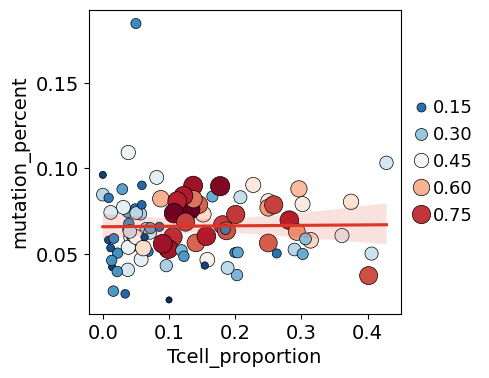

In [130]:
out['batch'] = out['PCAcluster'].str.split('_').str[0]
sns.scatterplot(data=out,x='Tcell_proportion',y='mutation_percent',hue='CSR_counts',
                edgecolor='black',sizes=(20, 200),
                size='CSR_counts',palette='RdBu_r')
#sns.kdeplot(data=out,x='CSR_counts',y='Tcell_proportion', weights='pseudogenes_mean',
#            fill=False, cmap ='inferno', bw_adjust=1, cut=1,thresh=0.8,levels=5)
sns.regplot(data=out,marker=None,
            x='Tcell_proportion',scatter=False,
            y='mutation_percent',
            scatter_kws={'alpha':0.7},
            line_kws={'color':'#DB3628'})
legend = plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=False)
for text in legend.get_texts():
    text.set_color('black')

plt.grid(False)

import scipy.stats as st
r, p = st.pearsonr(out['Tcell_proportion'], out['mutation_percent'])
print(f"Pearson r = {r:.3f}, p = {p:.4g}")
plt.savefig('Figure5q.pdf')

# Figure5R

In [ ]:
adata1 = sc.read_h5ad('/data1/fengyu/methods/zy/D06047A2/combine_3_meta/Final_D06047A2_after_processed_withThree_meta.h5ad')
adata2 = sc.read_h5ad('/data1/fengyu/methods/zy/D06047C3/combine_3_meta/Final_D06047C3_after_processed_withThree_meta.h5ad')
adata3 = sc.read_h5ad('/data1/fengyu/methods/zy/D06047D4/combine_3_meta/Final_D06047D4_after_processed_withThree_meta.h5ad')
adata4 = sc.read_h5ad('/data1/fengyu/methods/zy/D06047E1/combine_3_meta/Final_D06047E1_after_processed_withThree_meta.h5ad')
adata5 = sc.read_h5ad('/data1/fengyu/methods/zy/D06047E2/combine_3_meta/Final_D06047E2_after_processed_withThree_meta.h5ad')
adata6 = sc.read_h5ad('/data1/fengyu/methods/zy/D06047F6/combine_3_meta/Final_D06047F6_after_processed_withThree_meta.h5ad')
adata7 = sc.read_h5ad('/data1/fengyu/methods/zy/D06050A2/combine_3_meta/Final_D06050A2_after_processed_withThree_meta.h5ad')
adata8 = sc.read_h5ad('/data1/fengyu/methods/zy/D06050C2/combine_3_meta/Final_D06050C2_after_processed_withThree_meta.h5ad')
adata9 = sc.read_h5ad('/data1/fengyu/methods/zy/D06050D4/with_3_meta/Final_D06050D4_after_processed_withThree_meta.h5ad')
adata10 = sc.read_h5ad('/data1/fengyu/methods/zy/D06050E4/with_3_meta/Final_D06050E4_after_processed_withThree_meta.h5ad')
adata11 = sc.read_h5ad('/data1/fengyu/methods/zy/P5_D06053D2_ananlysis/Latest_analysis_6.12/readid4/Final_D06053D2_after_processed_cellbin.h5ad')

# 确保变量名唯一
adata_list = [adata1, adata2, adata3, adata4, adata5, adata6, adata7, adata8, adata9, adata10, adata11]
for adata in adata_list:
    adata.var_names_make_unique()

# 合并数据
batch_categories = ["D06047A2", "D06047C3", "D06047D4", "D06047E1", "D06047E2", "D06047F6", "D06050A2", "D06050C2", "D06050D4", "D06050E4", "D06053D2"]
adata = adata1.concatenate(adata_list[1:], batch_key="batch", batch_categories=batch_categories)

In [134]:
meta=pd.read_csv('/data1/fengyu/methods/fig5/LA_bin50_meta.csv',index_col=0)
adata.obs['loc']=adata.obs['batch'].astype(str)+'_'+adata.obs['bin50_x'].map(str)+'_'+adata.obs['bin50_y'].map(str)
adata.obs=adata.obs.merge(meta[['loc','LA_anno']],on='loc',how='left')

/home/fengyu/miniconda3/envs/st/lib/python3.8/site-packages/anndata/_core/anndata.py:788: UserWarning: 
AnnData expects .obs.index to contain strings, but got values like:
    [0, 1, 2, 3, 4]

    Inferred to be: integer

  value_idx = self._prep_dim_index(value.index, attr)


/tmp/ipykernel_3147264/2534308408.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')
/tmp/ipykernel_3147264/2534308408.py:13: UserWarning: 

Support for alternate kernels has been removed; using Gaussian kernel.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=tmp[tmp['TRBcdr3aa'].isin(ls)], x='x', y='y', fill=False, cmap='Reds', bw_adjust=0.2,thresh=0.5, kernel='linear', cbar=True,cut=0.2,alpha=0.7)


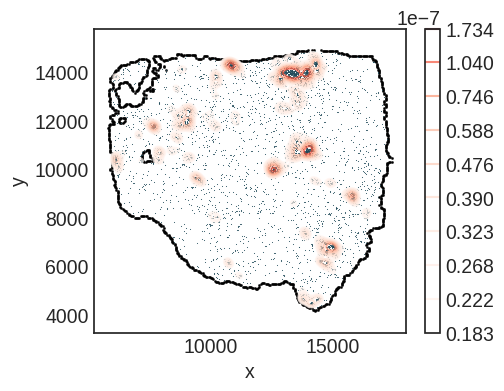

In [135]:
for m,i in zip([adata1,adata11],
               ['D06047A2']):
    df=adata.obs[adata.obs['batch'] == i]
    ls=df[(df['LA_anno']=='PCA_IGHG/A')&(df['TRBcdr3aa'].notna())]['TRBcdr3aa'].unique().to_list()
    plt.style.use('seaborn-white')
    plt.figure(figsize=(5, 4))
    plt.grid(False)
    plt.axis('equal')
    tissue_outline=pd.DataFrame(m.uns['tissue_outline'],columns=['x','y'])
    sns.scatterplot(data=tissue_outline,x='x',y='y',color='black',s=3,edgecolor=None)
    tmp=m.obs
    sns.scatterplot(data=tmp[tmp['TRBcdr3aa'].isin(ls)],x='x',y='y',color='#204B5A',s=0.5,edgecolor = None)
    sns.kdeplot(data=tmp[tmp['TRBcdr3aa'].isin(ls)], x='x', y='y', fill=False, cmap='Reds', bw_adjust=0.2,thresh=0.5, kernel='linear', cbar=True,cut=0.2,alpha=0.7)
    plt.savefig('Figure5r_in_'+i+'overview.png',dpi=600, bbox_inches='tight')
    '''
    plt.figure(figsize=(5, 4))
    plt.grid(False)
    sns.scatterplot(data=tissue_outline,x='x',y='y',color='white',s=3,edgecolor=None)
    sns.scatterplot(data=tmp[(~tmp['TRBcdr3aa'].isin(ls))&((tmp['TRBcdr3aa'].notna()))],x='x',y='y',color='#9bf6ff',s=5,edgecolor = None)
#    sns.kdeplot(data=tmp[(~tmp['TRBcdr3aa'].isin(ls))&((tmp['TRBcdr3aa'].notna()))], x='x', y='y', fill=False, cmap='', bw_adjust=0.2,thresh=0.5, kernel='linear', cbar=True,cut=0.2,alpha=0.7)
    plt.savefig('Figure5K_notin_'+i+'overview.png',dpi=600, bbox_inches='tight')
    '''

/tmp/ipykernel_3147264/1535583639.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


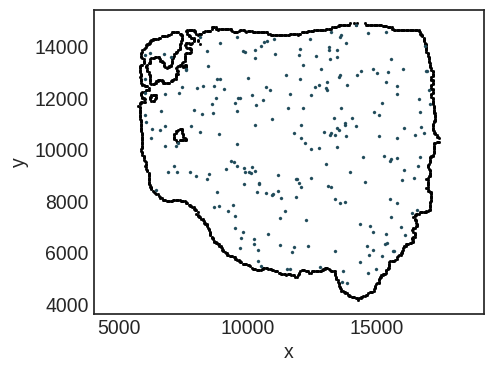

In [136]:
for m,i in zip([adata1,adata11],
               ['D06047A2']):
    df=adata.obs[adata.obs['batch'] == i]
    ls=df[(df['LA_anno']=='PCA_IGHG/A')&(df['TRBcdr3aa'].notna())]['TRBcdr3aa'].unique().to_list()
    plt.style.use('seaborn-white')
    #plt.figure(figsize=(6, 4))
    #plt.grid(False)
    '''
    tissue_outline=pd.DataFrame(m.uns['tissue_outline'],columns=['x','y'])
    sns.scatterplot(data=tissue_outline,x='x',y='y',color='black',s=3,edgecolor=None)
    tmp=m.obs
    sns.scatterplot(data=tmp[tmp['TRBcdr3aa'].isin(ls)],x='x',y='y',color='#204B5A',s=0.5,edgecolor = None)
    sns.kdeplot(data=tmp[tmp['TRBcdr3aa'].isin(ls)], x='x', y='y', fill=False, cmap='Reds', bw_adjust=0.2,thresh=0.5, kernel='linear', cbar=True,cut=0.2,alpha=0.7)
    plt.savefig('Figure5K_in_'+i+'zoomin.png',dpi=2500, bbox_inches='tight')
    '''
    plt.figure(figsize=(5, 4))
    plt.axis('equal')
    tissue_outline=pd.DataFrame(m.uns['tissue_outline'],columns=['x','y'])
    sns.scatterplot(data=tissue_outline,x='x',y='y',color='black',s=3,edgecolor=None)
    tmp=m.obs
    plt.grid(False)
    sns.scatterplot(data=tissue_outline,x='x',y='y',color='black',s=3,edgecolor=None)
    sns.scatterplot(data=tmp[(~tmp['TRBcdr3aa'].isin(ls))&((tmp['TRBcdr3aa'].notna()))],x='x',y='y',color='#204B5A',s=5,edgecolor = None)
    #sns.kdeplot(data=tmp[(~tmp['TRBcdr3aa'].isin(ls))&((tmp['TRBcdr3aa'].notna()))], x='x', y='y', fill=False, cmap='', bw_adjust=0.2,thresh=0.5, kernel='linear', cbar=True,cut=0.2,alpha=0.7)
    plt.savefig('Figure5r_notin_'+i+'zoomin.png',dpi=2500, bbox_inches='tight')

# Figure5S

In [1]:
import scanpy as sc
import pandas as pd
import numpy as np    
import matplotlib.pyplot as plt
import seaborn as sns
import os
#import squidpy as sq

/home/fengyu/miniconda3/envs/st/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
adata1 = sc.read_h5ad('/data1/fengyu/methods/zy/D06047A2/combine_3_meta/Final_D06047A2_after_processed_withThree_meta.h5ad')
adata2 = sc.read_h5ad('/data1/fengyu/methods/zy/D06047C3/combine_3_meta/Final_D06047C3_after_processed_withThree_meta.h5ad')
adata3 = sc.read_h5ad('/data1/fengyu/methods/zy/D06047D4/combine_3_meta/Final_D06047D4_after_processed_withThree_meta.h5ad')
adata4 = sc.read_h5ad('/data1/fengyu/methods/zy/D06047E1/combine_3_meta/Final_D06047E1_after_processed_withThree_meta.h5ad')
adata5 = sc.read_h5ad('/data1/fengyu/methods/zy/D06047E2/combine_3_meta/Final_D06047E2_after_processed_withThree_meta.h5ad')
adata6 = sc.read_h5ad('/data1/fengyu/methods/zy/D06047F6/combine_3_meta/Final_D06047F6_after_processed_withThree_meta.h5ad')
adata7 = sc.read_h5ad('/data1/fengyu/methods/zy/D06050A2/combine_3_meta/Final_D06050A2_after_processed_withThree_meta.h5ad')
adata8 = sc.read_h5ad('/data1/fengyu/methods/zy/D06050C2/combine_3_meta/Final_D06050C2_after_processed_withThree_meta.h5ad')
adata9 = sc.read_h5ad('/data1/fengyu/methods/zy/D06050D4/with_3_meta/Final_D06050D4_after_processed_withThree_meta.h5ad')
adata10 = sc.read_h5ad('/data1/fengyu/methods/zy/D06050E4/with_3_meta/Final_D06050E4_after_processed_withThree_meta.h5ad')
adata11 = sc.read_h5ad('/data1/fengyu/methods/zy/P5_D06053D2_ananlysis/Latest_analysis_6.12/readid4/Final_D06053D2_after_processed_cellbin.h5ad')

# 确保变量名唯一
adata_list = [adata1, adata2, adata3, adata4, adata5, adata6, adata7, adata8, adata9, adata10, adata11]
for adata in adata_list:
    adata.var_names_make_unique()

# 合并数据
batch_categories = ["D06047A2", "D06047C3", "D06047D4", "D06047E1", "D06047E2", "D06047F6", "D06050A2", "D06050C2", "D06050D4", "D06050E4", "D06053D2"]
adata = adata1.concatenate(adata_list[1:], batch_key="batch", batch_categories=batch_categories)

/home/fengyu/miniconda3/envs/st/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/fengyu/miniconda3/envs/st/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/fengyu/miniconda3/envs/st/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/fengyu/miniconda3/envs/st/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/fengyu/miniconda3/envs/st/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: 

In [4]:
meta=pd.read_csv('/data1/fengyu/methods/fig5/LA_bin50_meta.csv',index_col=0)
adata.obs['loc']=adata.obs['batch'].astype(str)+'_'+adata.obs['bin50_x'].map(str)+'_'+adata.obs['bin50_y'].map(str)
adata.obs=adata.obs.merge(meta[['loc','LA_anno']],on='loc',how='left')

/home/fengyu/miniconda3/envs/st/lib/python3.8/site-packages/anndata/_core/anndata.py:788: UserWarning: 
AnnData expects .obs.index to contain strings, but got values like:
    [0, 1, 2, 3, 4]

    Inferred to be: integer

  value_idx = self._prep_dim_index(value.index, attr)


In [5]:
import pandas as pd

# 假设 adata 是包含数据的对象
batch_categories = ["D06047A2", "D06047C3", "D06047D4", "D06047E1", "D06047E2", 
                    "D06047F6", "D06050A2", "D06050C2", "D06050D4", "D06050E4", "D06053D2"]

# 初始化一个空的 DataFrame 来存储数值结果
result_df = pd.DataFrame()

for batch in batch_categories:
    batch_data = adata.obs[adata.obs['batch'] == batch]
    
    # 获取目标 TRBcdr3aa 列表
    target_sequences = batch_data[(batch_data['LA_anno'] == 'PCA_IGHG/A') & 
                                (batch_data['TRBcdr3aa'].notna())]['TRBcdr3aa'].tolist()
    
    # 计算在目标列表中的 counts
    in_counts = batch_data[batch_data['TRBcdr3aa'].isin(target_sequences)]\
                ['TRBcdr3aa'].value_counts().rename(f'{batch}_in')
    
    # 计算不在目标列表中的 counts
    notin_counts = batch_data[(~batch_data['TRBcdr3aa'].isin(target_sequences)) & 
                            (batch_data['TRBcdr3aa'].notna())]\
                  ['TRBcdr3aa'].value_counts().rename(f'{batch}_notin')
    
    # 合并到结果 DataFrame 中
    batch_df = pd.concat([in_counts, notin_counts], axis=1)
    result_df = pd.concat([result_df, batch_df], axis=1)

# 填充 NA 为 0 并转换为整数
result_df = result_df.fillna(0).astype(int)

# 重置索引（这将把TRBcdr3aa从索引变成列）
result_df = result_df.reset_index()

# 如果有名为'TRBcdr3aa'的列，则去除它
if 'TRBcdr3aa' in result_df.columns:
    result_df = result_df.drop(columns=['TRBcdr3aa'])
# 同时检查是否有名为'index'的列（可能是重置索引产生的）
if 'index' in result_df.columns:
    result_df = result_df.drop(columns=['index'])

# 保存CSV，保留列名但不要行索引
result_df.to_csv('Figure5S_counts_matrix.csv', index=False)

# Figure 5T

In [6]:
def vector(on=False):
    if on:
        sc.set_figure_params(dpi=50, dpi_save=300, vector_friendly=False)
    else:
        sc.set_figure_params(dpi=50, dpi_save=300, vector_friendly=True)
vector(False)

In [7]:
cell=sc.read_h5ad('/data1/fengyu/methods/fig8/allLUAD_cellbin.h5ad')

In [8]:
cell=cell[cell.obs['batch']=='D06053D2']
iggTRB=cell[(cell.obs['LA_anno']=='PCA_IGHG/A')&(cell.obs['TRBcdr3aa'].notna())].obs['TRBcdr3aa'].unique()
allTRB=cell[(cell.obs['TRBcdr3aa'].notna())].obs['TRBcdr3aa'].unique()
notiggTRB=list(set(allTRB)-set(iggTRB))
cell.obs['IgGTRB']='NA'
cell.obs.loc[cell.obs['TRBcdr3aa'].isin(iggTRB),'IgGTRB']='yes'
cell.obs.loc[cell.obs['TRBcdr3aa'].isin(notiggTRB),'IgGTRB']='no'
interests=cell[(cell.obs['bin50 structural annotation']=='Tumor')]

/tmp/ipykernel_238619/1302124166.py:5: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  cell.obs['IgGTRB']='NA'


/home/fengyu/miniconda3/envs/st/lib/python3.8/site-packages/anndata/_core/anndata.py:1230: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/home/fengyu/miniconda3/envs/st/lib/python3.8/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


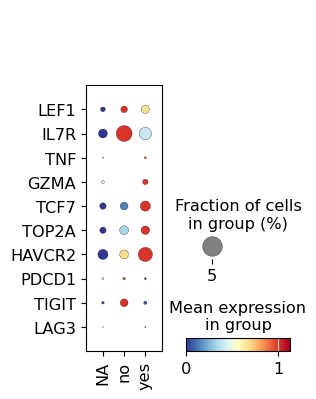

In [9]:
sc.pl.dotplot(interests,['LEF1','IL7R','TNF','GZMA','TCF7','TOP2A','HAVCR2','PDCD1','TIGIT','LAG3'],swap_axes=True,
              standard_scale='var',cmap='RdYlBu_r',dot_max=0.05,vmax=1.12,groupby='IgGTRB',show=False)
plt.savefig('Figure5T_dotplot.pdf',dpi = 600, bbox_inches='tight')
plt.show()  # 关闭图像，释放内存v